<a href="https://colab.research.google.com/github/Soumya164/Airbnb_Booking_Analysis/blob/main/Airbnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

Explore and analyze the data to discover key understandings (not limited to these) such as :
. What can we learn about different hosts and areas?
.What can we learn from predictions? (ex: locations, prices, reviews, etc)
.Which hosts are the busiest and why?
.Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [156]:
pip install geopandas

In [157]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import point, polygon
from wordcloud import WordCloud
sns.set_style("whitegrid", {'grid.linestyle': ''})
sns.set(rc={'figure.figsize':(16.7,8.27)})
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/DataSetAlmabetter/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

In [5]:
df.head(2)

id  ... availability_365
0  2539  ...              365
1  2595  ...              355

[2 rows x 16 columns]

In [6]:
df.tail(2)

id  ... availability_365
48893  36485609  ...                2
48894  36487245  ...               23

[2 rows x 16 columns]

In [7]:
df.info

<bound method DataFrame.info of              id  ... availability_365
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
4          5022  ...                0
...         ...  ...              ...
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[48895 rows x 16 columns]>

In [8]:
df.describe()

id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   1.901714e+07  ...        112.781327
std    1.098311e+07  ...        131.622289
min    2.539000e+03  ...          0.000000
25%    9.471945e+06  ...          0.000000
50%    1.967728e+07  ...         45.000000
75%    2.915218e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

In [9]:
len(df.index)

48895

In [10]:
df.shape

(48895, 16)

In [11]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
plt.rcParams['figure.figsize'] = [16.7,8.27]

In [12]:
df_with_na = df.copy()

In [13]:
# geting the number of unique names from the name column
df.name.nunique()

47905

In [14]:
df.host_name

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object

In [ ]:
df.host_id

0            2787
1            2845
2            4632
3            4869
4            7192
           ...   
48890     8232441
48891     6570630
48892    23492952
48893    30985759
48894    68119814
Name: host_id, Length: 48895, dtype: int64

In [15]:
# geting the number of unique id from the host_id column
df.host_id.nunique()

37457

In [16]:
df.host_name

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object

In [17]:
# geting the number of unique host name from the host_name column 
df.host_name.nunique()

11452

In [18]:
# geting unique neighborhood groups from the neighborhood_groups column 
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


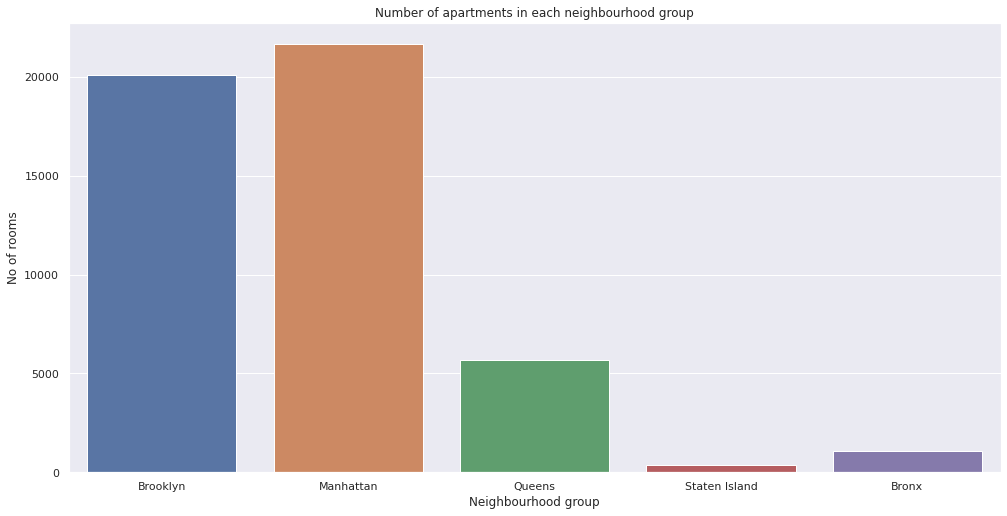

In [19]:
# creating a count plot
sns.countplot(df.neighbourhood_group).set_title('Number of apartments in each neighbourhood group')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood group')
plt.show()

In [20]:
df.neighbourhood.nunique()

221

In [21]:
#creating a count plot
sns.countplot(df.neighbourhood, order = df.neighbourhood.value_counts().iloc[:20].index ).set_title('Top 20 neighbourhood with max no of rooms')
#rotating the x axis labels 
plt.xticks(rotation=30,ha='right')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.figure(figsize=(16.7,8.27)) 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1202.4x595.44 with 0 Axes>

In [22]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [23]:
#storing all the diffrent neighbourhood groups to diffrent data frames 
brooklyn_group_df=df.loc[df['neighbourhood_group']== 'Brooklyn']
manhattan_group_df=df.loc[df['neighbourhood_group']== 'Manhattan']
Queens_group_df=df.loc[df['neighbourhood_group']== 'Queens']
Staten_Island_group_df=df.loc[df['neighbourhood_group']== 'Staten Island']
Bronx_group_df=df.loc[df['neighbourhood_group']== 'Bronx']

In [24]:
# top 10 areas in brooklyn with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=brooklyn_group_df, palette="husl",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 brooklyn neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

Text(0.5, 0, 'No of rooms')

Text(0.5, 0, 'No of rooms')

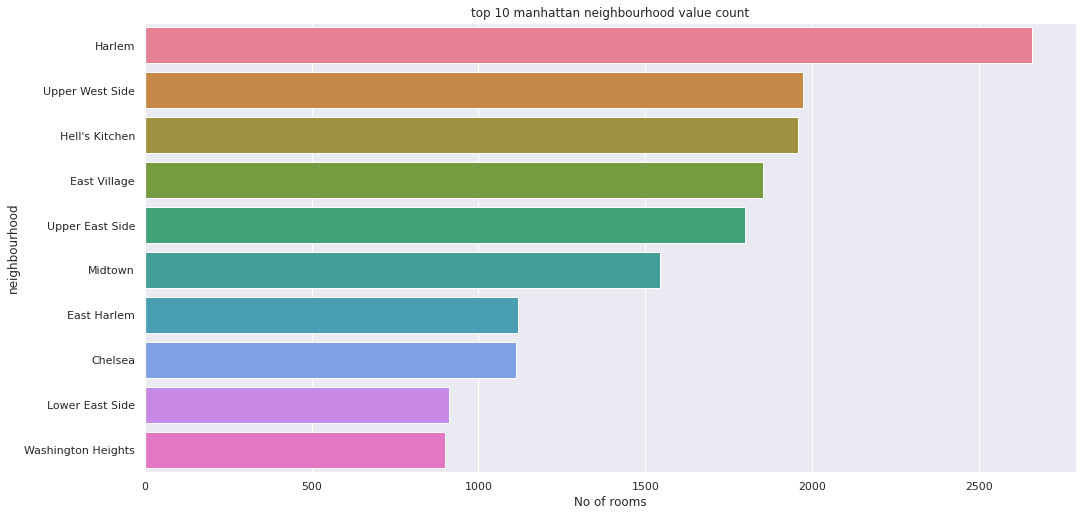

In [25]:
# top 10 areas in manhattan with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=manhattan_group_df, palette="husl",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 manhattan neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

In [26]:
# top 10 areas in Queens with most booking
#creating a count plot

sns.countplot(y="neighbourhood", data=Queens_group_df, palette="husl",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Queens neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

Text(0.5, 0, 'No of rooms')

Text(0.5, 0, 'No of rooms')

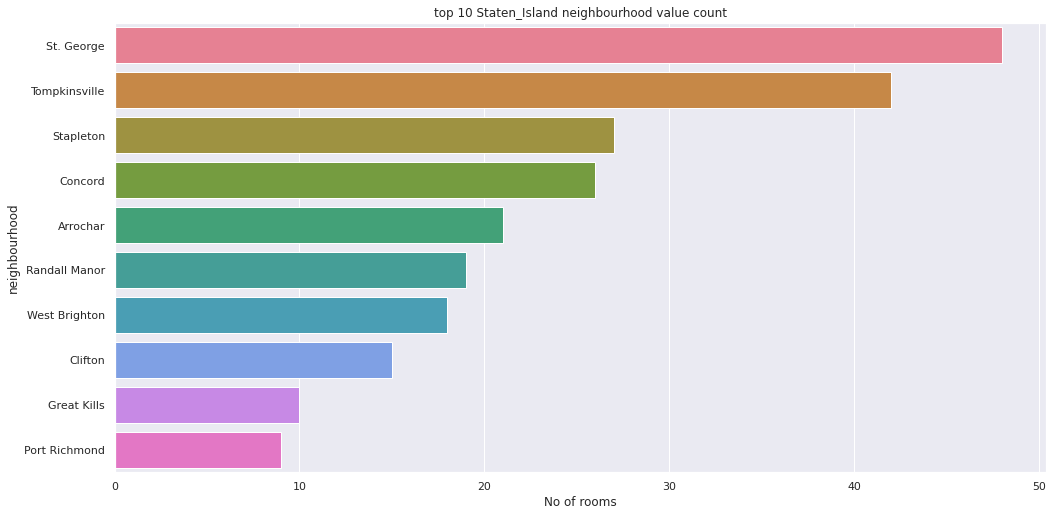

In [27]:
# top 10 areas in Staten_Island with most booking
#creating a count plot

sns.countplot(y="neighbourhood", data=Staten_Island_group_df, palette="husl",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Staten_Island neighbourhood value count')

#adding x and y labels to the plot
plt.xlabel('No of rooms')    

Text(0.5, 0, 'No of rooms')

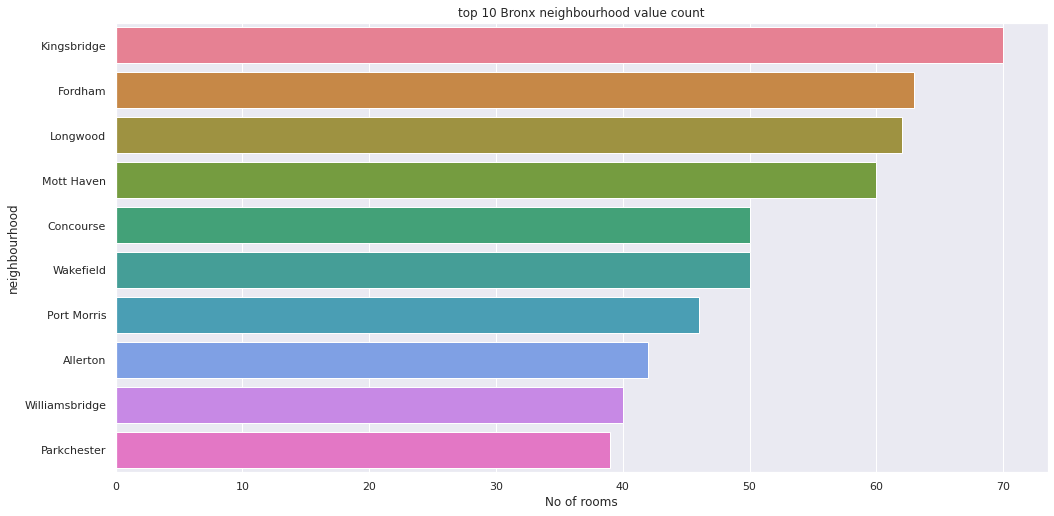

In [28]:
#top 10 areas in Staten_Island with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=Bronx_group_df, palette="husl",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Bronx neighbourhood value count')

#adding x and y labels to the plot
plt.xlabel('No of rooms')     

Text(0.5, 1.0, 'top 10 Bronx neighbourhood value count')

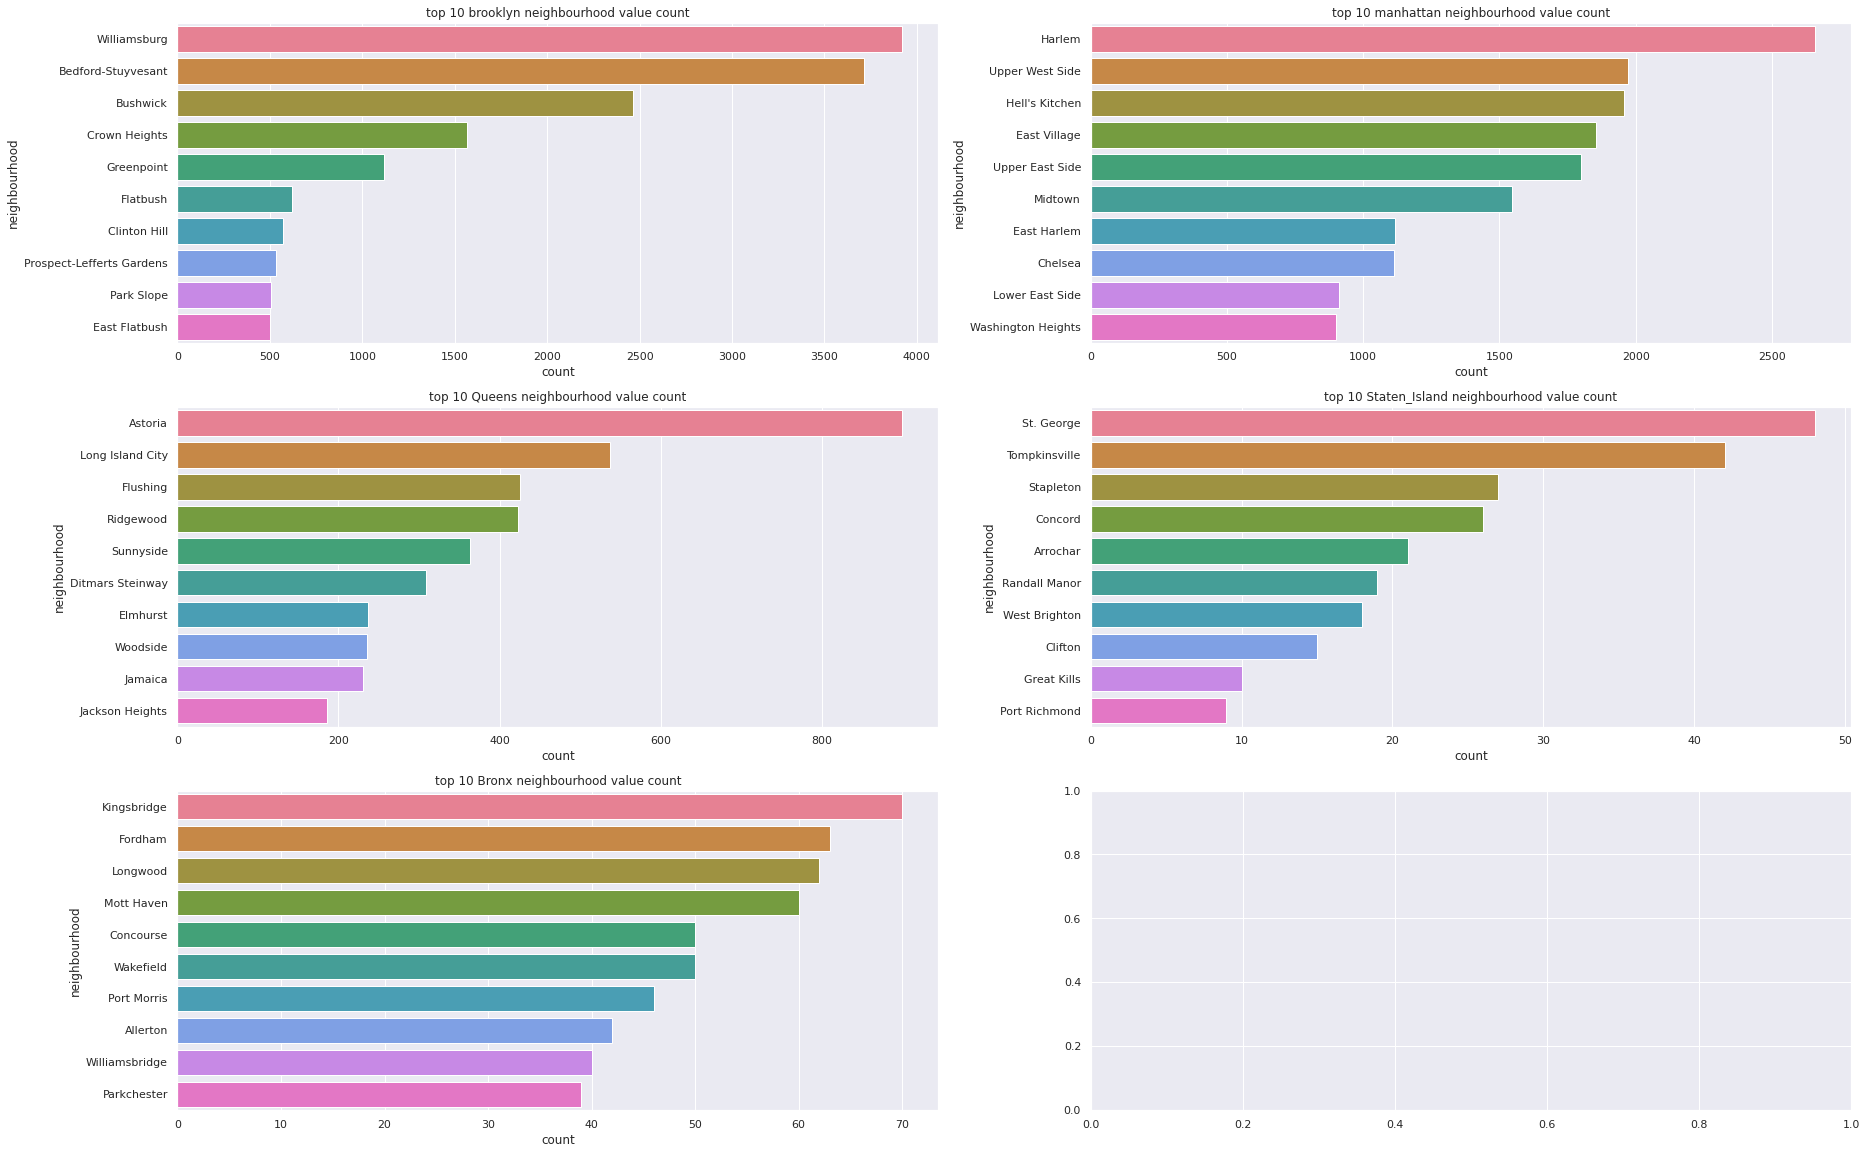

In [29]:
# creating subplots to plot all the graphs together 
fig, axes = plt.subplots(3,2, figsize=(30, 20))
sns.countplot(ax=axes[0,0],y="neighbourhood", data=brooklyn_group_df, palette="husl",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 brooklyn neighbourhood value count')
              
sns.countplot(ax=axes[0,1],y="neighbourhood", data=manhattan_group_df, palette="husl",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 manhattan neighbourhood value count')

sns.countplot(ax=axes[1,0],y="neighbourhood", data=Queens_group_df, palette="husl",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Queens neighbourhood value count')

sns.countplot(ax=axes[1,1],y="neighbourhood", data=Staten_Island_group_df, palette="husl",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Staten_Island neighbourhood value count')

sns.countplot(ax=axes[2,0],y="neighbourhood", data=Bronx_group_df, palette="husl",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Bronx neighbourhood value count')

Observations

1. willamsburg, bedford and bushwick have most no of bookings in brooklyn neighbourhood_group
2. Harlem, Upper West Side and Hell's Kitchen have most no of bookings in manhattan neighbourhood_group
3. astoria, flushing and long island city have most no of bookings in Queens neighbourhood_group
4. tompkinsville, St.George, cancaord ave most no of bookings in Staten_Island neighbourhood_group
5. in bronx neighbourhood_group all the neighbourhood have almost equal no of bookings

**Column NO. 6 & 7 : latitude & longitude**

In [30]:
df.latitude.describe()

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64

In [31]:
df.longitude.describe()

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64

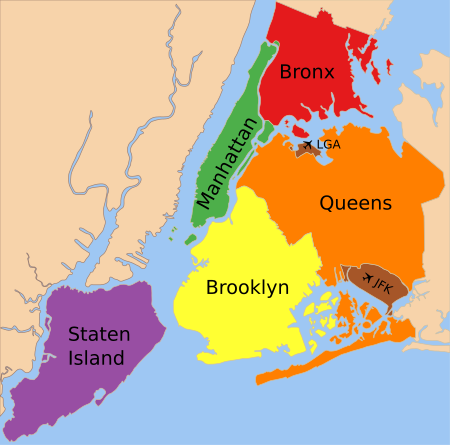

Text(0.5, 1.0, 'Density of rooms')

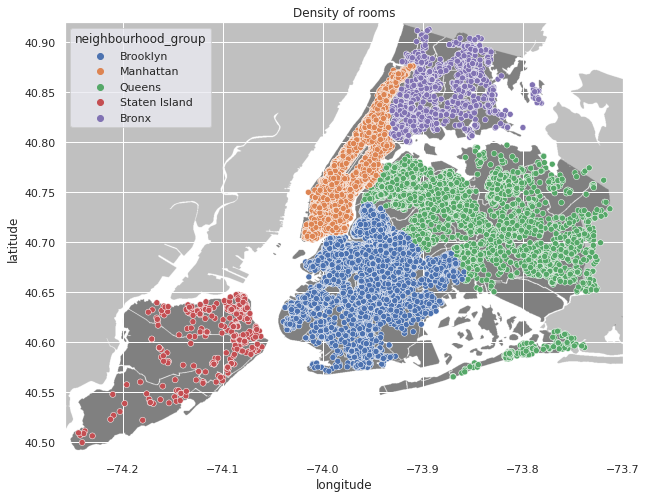

In [32]:
data = df[["latitude","longitude",'neighbourhood_group']]
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#adding the image from wikipedia
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
#reading the image
image=plt.imread(img)
#scaling img with max latitude and logtitude and makeig some minor adgustment to fit the points
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
#creating an scaterplot
sns.scatterplot(data = data,x='longitude',y='latitude',hue='neighbourhood_group').set_title('Density of rooms')

**Column NO. 8 : Room Type**

1. Customer prefer entire home/apt or private room. only very few customer prefer to book shared rooms.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Type of rooms')

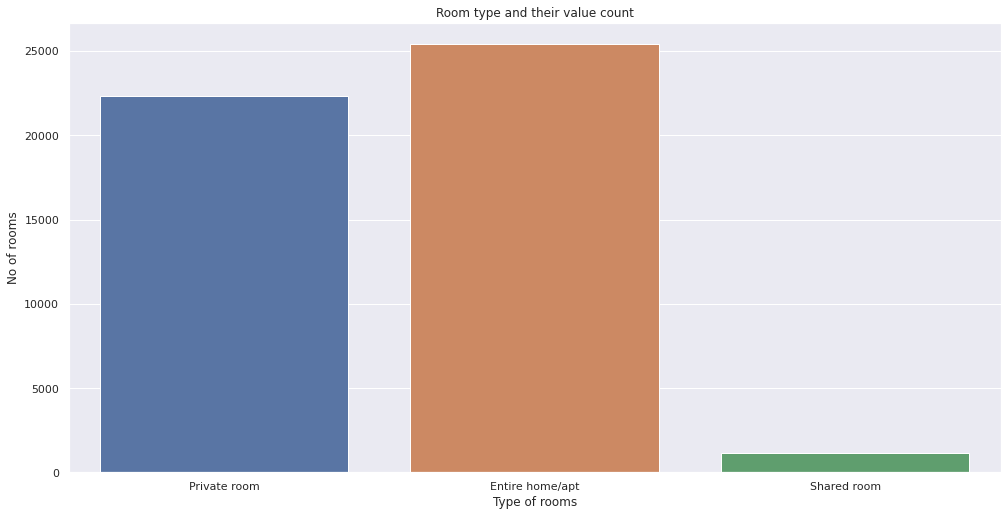

In [33]:
#creating a count plot
sns.countplot(df['room_type']).set_title('Room type and their value count')
#adding x and y labels to the plot
plt.ylabel('No of rooms') 
plt.xlabel('Type of rooms')

**Column NO. 9 : price**

1. people prefer the rooms in range of 50 to 200

2. mean and median of price for the data set with outliers are 162 and 112

3. mean and median of price for the data set with outliers are 146 and 110

Text(0, 0.5, 'No of rooms')

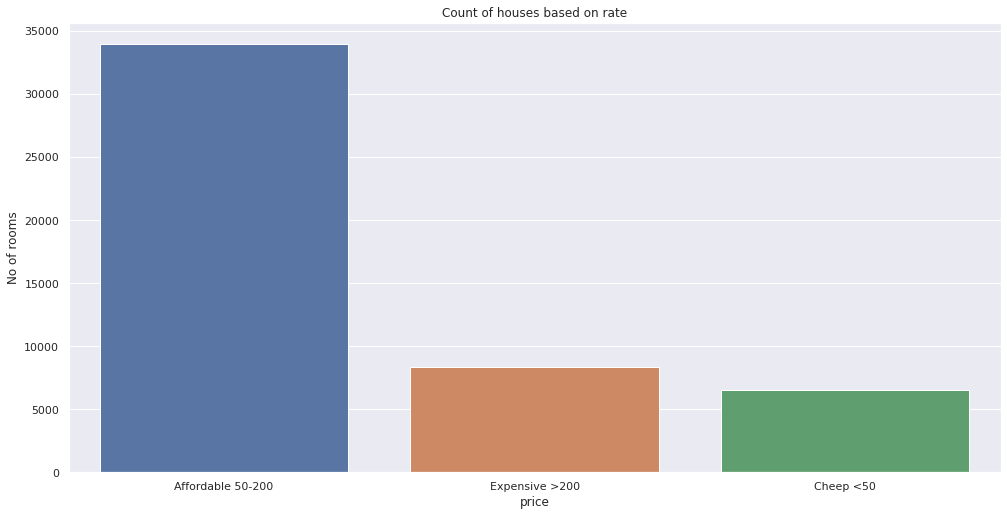

In [34]:
'''
dividing price range in 3 groups 
1) cheep i.e price below 50
2) affordable i.e price betwenn 50 & 200
3) expensive i.e price above 200
'''
def price_catagory(price):
  if price<=50:
    return 'Cheep <50'
  elif price>=50 and price<=200:
    return 'Affordable 50-200'
  else:
    return 'Expensive >200'
#creating a count plot 
sns.countplot(x=df.price.apply(price_catagory)).set_title('Count of houses based on rate')
#adding y label to the plot
plt.ylabel('No of rooms')

In [35]:
sns.distplot(df.price)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


**Column NO. 10 : minimum_nights**

1. The graph is a right screwed (positive skewness).

In [36]:
#creating a count plot 
sns.countplot(df.minimum_nights,order=df.minimum_nights.value_counts().iloc[:10].index).set_title('minimum nights for max no of rooms')
#rotating x lables 
plt.xticks(rotation=90)
#adding x and y labels to the plot
plt.ylabel('No of rooms')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

In [37]:
sns.distplot(df_with_na.minimum_nights).set_title('min nights density plot befor removeing outliers')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'min nights density plot befor removeing outliers')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'min nights density plot after removeing outliers')

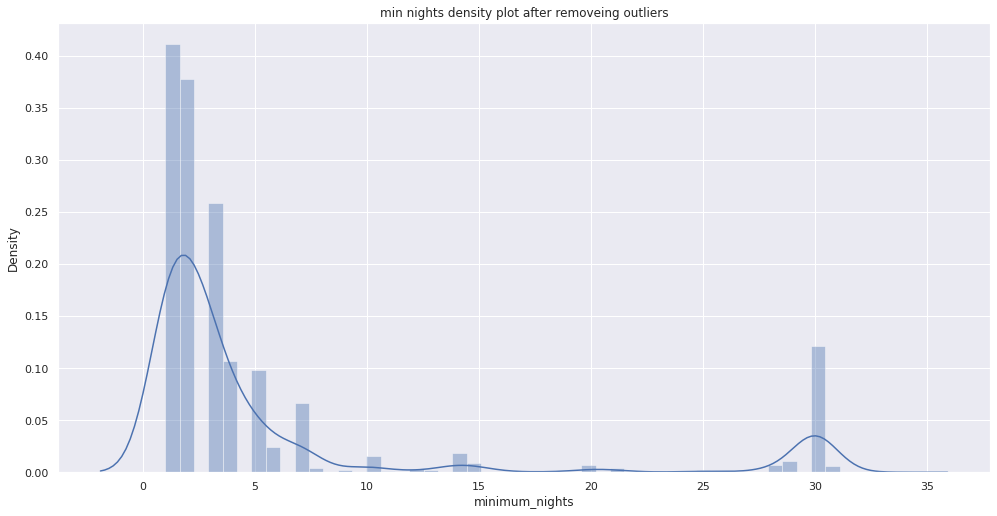

In [38]:
# subsetting the df with values of min night under 35
min_nights_df=df[df.minimum_nights<35]
#creating a distplot
sns.distplot(min_nights_df.minimum_nights).set_title('min nights density plot after removeing outliers')

**Column NO. 11 : number_of_reviews**

This column tells us about the number of reviews an apartment has got so far where the min value is 0 its cause can be

1. no one has visited this place
2. no one has reviewed
3. the values are missing
It has a mean of 32, median of 10, and max of 629 rating

From the graph, we can say that it is a right screwed (positive skewness) with very few homes rated above 200

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


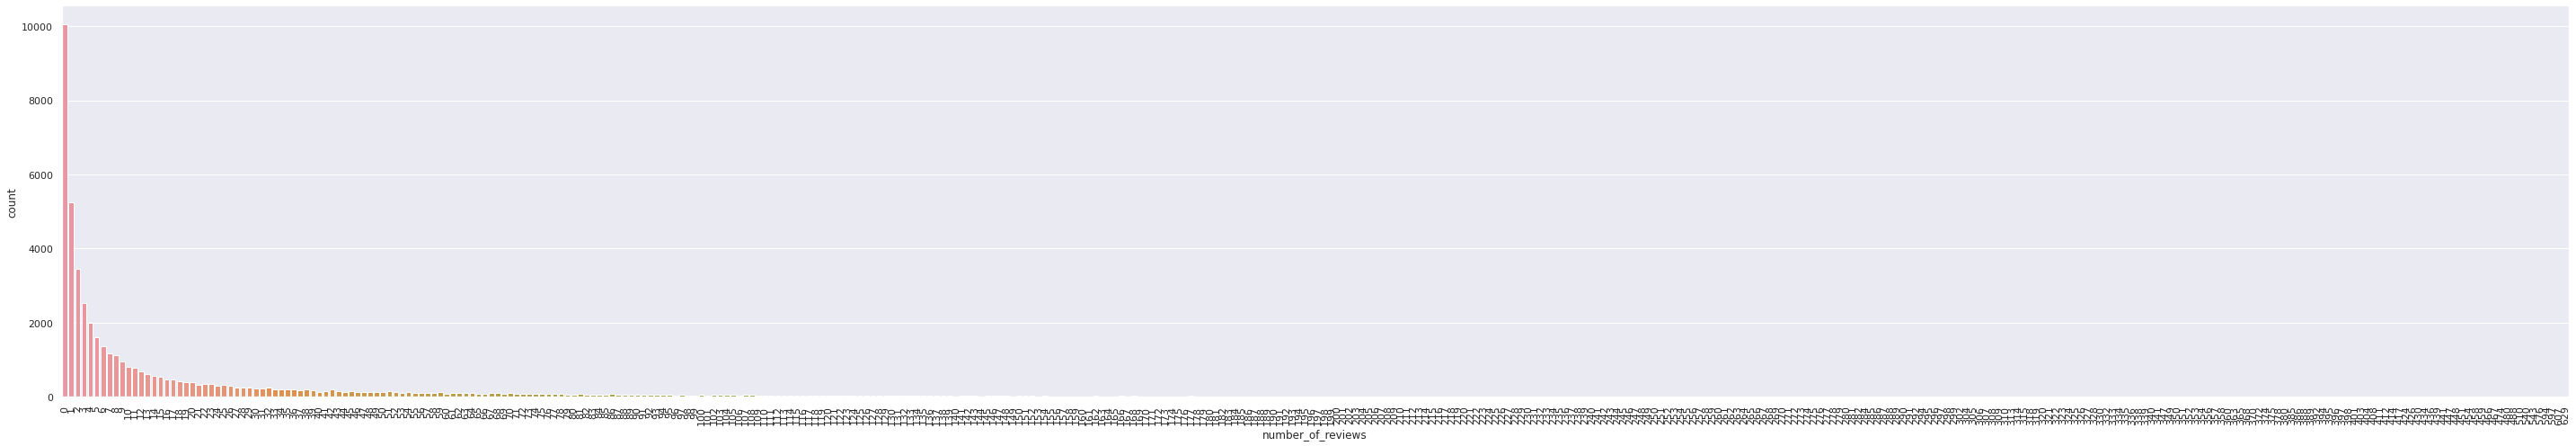

In [39]:
#settingt he size of the figure 
plt.figure(figsize=(50,8))
#creating a caunt plot
sns.countplot(df.number_of_reviews)
#rotating the x lables
plt.xticks(rotation=90)
plt.show()

In [40]:
#creating a dist plot
sns.distplot(df.number_of_reviews)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


**Column NO. 12 : last_review**

In [41]:
df['last_review']=pd.to_datetime(df['last_review'])
df.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [42]:
#printing the least and most recent review date
least_recent_date = df['last_review'].min()
most_recent_date = df['last_review'].max()
print(f'the least recent date is {least_recent_date.date()} and the most recent date is {most_recent_date.date()} in last review')

the least recent date is 2011-03-28 and the most recent date is 2019-07-08 in last review


In [43]:
df[df.last_review < '2015-01-01'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 20 to 6546
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              279 non-null    int64         
 1   name                            279 non-null    object        
 2   host_id                         279 non-null    int64         
 3   host_name                       279 non-null    object        
 4   neighbourhood_group             279 non-null    object        
 5   neighbourhood                   279 non-null    object        
 6   latitude                        279 non-null    float64       
 7   longitude                       279 non-null    float64       
 8   room_type                       279 non-null    object        
 9   price                           279 non-null    int64         
 10  minimum_nights                  279 non-null    int64         
 11  numb

In [44]:
df[df.last_review.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10052 entries, 2 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              10052 non-null  int64         
 1   name                            10042 non-null  object        
 2   host_id                         10052 non-null  int64         
 3   host_name                       10047 non-null  object        
 4   neighbourhood_group             10052 non-null  object        
 5   neighbourhood                   10052 non-null  object        
 6   latitude                        10052 non-null  float64       
 7   longitude                       10052 non-null  float64       
 8   room_type                       10052 non-null  object        
 9   price                           10052 non-null  int64         
 10  minimum_nights                  10052 non-null  int64         
 11  nu

This column tells us about the when an apartment got his last review an apartment where there are some missing values its reason can be that

1. no one has visited this place
2. no one has reviewed
3. the values are missing
The least_recent_date is 2011-04-25 and the most_recent_date is 2019-07-08 in last review

we can conclude that these apartments may have been closed or not available as no one has reviewed them for 50 years

there are a total of 94 apartments that haven't been reviewed in the last 5 years and 5207 absent data

**Column NO. 13 : reviews_per_month**

In [45]:
df.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [46]:
#creating histplot and adding lablesto y axis
sns.histplot(df[df['reviews_per_month']>0].reviews_per_month)
plt.ylabel('No of rooms')

Text(0, 0.5, 'No of rooms')

observations

1. very less amount of houses have review per month greater than 5
2. columns has a mean of 0.92 and a max of 58.5

**Column NO. 14 : calculated_host_listings_count**

In [47]:
#grouping by host id and taking sum of reviews per month
top_10_host_listings_count=df.groupby(['host_id']).agg({'calculated_host_listings_count':'max'}).sort_values('calculated_host_listings_count',ascending=False).reset_index()
#taking top 10 from df and storing it in list  
top_10_host_listings_count_list=top_10_host_listings_count[:10]['host_id'].tolist()
# finding the names of all the top 10 host by host id 
top_10_host_listings_count_df=df[df.host_id.isin(top_10_host_listings_count_list)].sort_values('calculated_host_listings_count',ascending=False)

In [48]:
# code to add the count on top of bar graph
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

#creating a bar graph 
sns.barplot(x="host_name", y='calculated_host_listings_count' ,data=top_10_host_listings_count_df).set_title('top 10 in calculated_host_listings_count')
# adding lables on bar graph
addlabels(top_10_host_listings_count_df.host_name.unique().tolist(),top_10_host_listings_count[:10]['calculated_host_listings_count'].tolist())
#adding y label to plot 
plt.ylabel('No of rooms')
plt.xticks(rotation=90)
plt.figure(figsize=(16.7,8.27)) 

<Figure size 1202.4x595.44 with 0 Axes>

<Figure size 1202.4x595.44 with 0 Axes>

observation

The top hosts with max listing count are sonder(NYC) followed by Blueground with 327 and 232 rooms respectively

**Column NO. 15 : availability_365**

In [49]:
df.availability_365.describe() 

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x595.44 with 0 Axes>

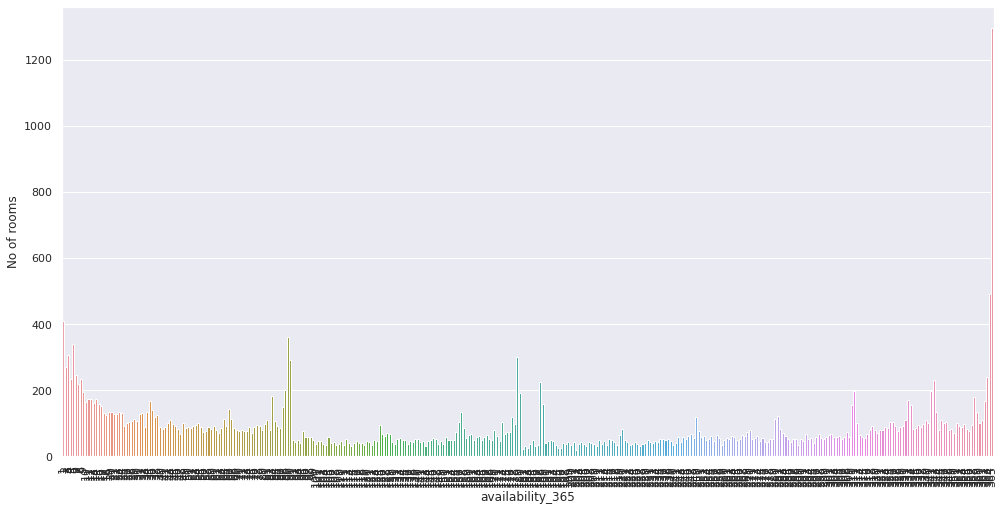

<Figure size 1440x595.44 with 0 Axes>

In [50]:
df_365_0=df.loc[df['availability_365']>0]
sns.countplot(df_365_0.availability_365)
plt.xticks(rotation=90)
plt.ylabel('No of rooms')
plt.figure(figsize=(20,8.27)) 

In [51]:
sns.distplot(df.availability_365).set_title("availability_365 density plot befor removeing outliers")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'availability_365 density plot befor removeing outliers')

In [52]:
df_365_0=df.loc[df['availability_365']>0]
sns.distplot(df_365_0.availability_365).set_title("availability_365 density plot after removeing outliers")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'availability_365 density plot after removeing outliers')

Observations

most of the rooms are either available for less than 16 days or almost full year

**Data cleaing and wrangling**

In [53]:
#drooping columns 
df.drop(['last_review'], axis=1, inplace=True)
df.head(3)

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365

[3 rows x 15 columns]

In [54]:
#converting nul values of host name to host ids
df['host_name']= df['host_name'].fillna(df['host_id'])
#replacing nan values with blank space
df['name'] = df['name'].fillna(df['neighbourhood']+df['room_type'])

In [55]:
#converting all NaN value to zero.
df.fillna(0,inplace=True)
df.head(3)

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365

[3 rows x 15 columns]

number of listed properties which available for zero days can be drop. As we assuming, they delisted there properties.

In [56]:
#remove rows where price is zero &avalibaility_365==0
df_del_index = df[(df['price']==0) | (df['availability_365']==0)].index
df_del = df[(df['price']==0) | (df['availability_365']==0)]   
#remove rows where avalibaility_365==0
df.drop(df_del_index,inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31354 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31354 non-null  int64  
 1   name                            31354 non-null  object 
 2   host_id                         31354 non-null  int64  
 3   host_name                       31354 non-null  object 
 4   neighbourhood_group             31354 non-null  object 
 5   neighbourhood                   31354 non-null  object 
 6   latitude                        31354 non-null  float64
 7   longitude                       31354 non-null  float64
 8   room_type                       31354 non-null  object 
 9   price                           31354 non-null  int64  
 10  minimum_nights                  31354 non-null  int64  
 11  number_of_reviews               31354 non-null  int64  
 12  reviews_per_month               

number of neighboorhood group and neighbourhood are lists

In [58]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [59]:
#number of neighbourhood listed?
len(df['neighbourhood'].unique())

218

In [60]:
#number of types of room listed
df['room_type'].value_counts()

Entire home/apt    16532
Private room       13960
Shared room          862
Name: room_type, dtype: int64

In [61]:
#set figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})

data visuvalization

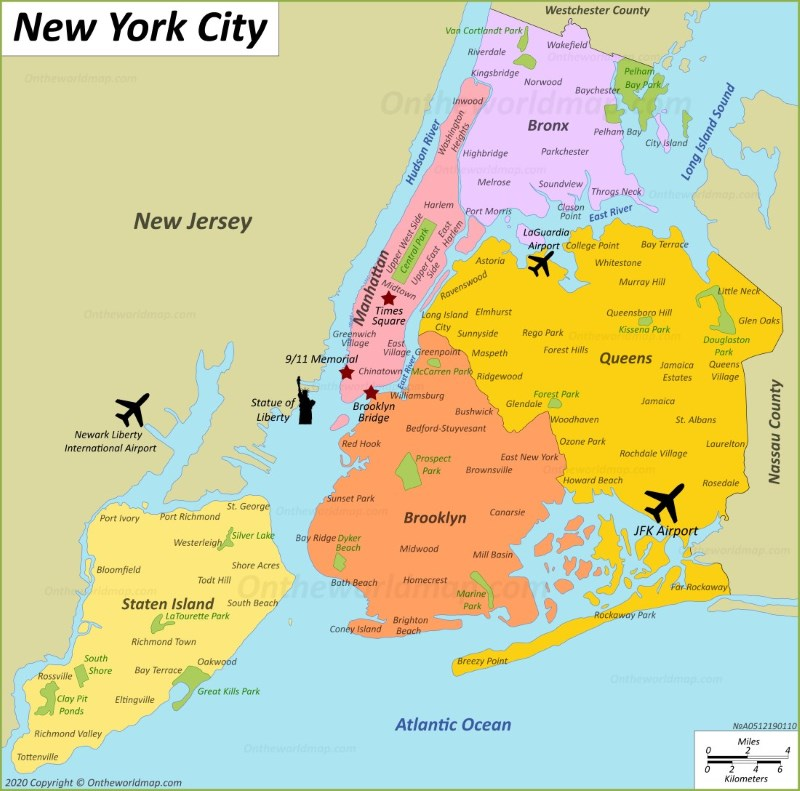

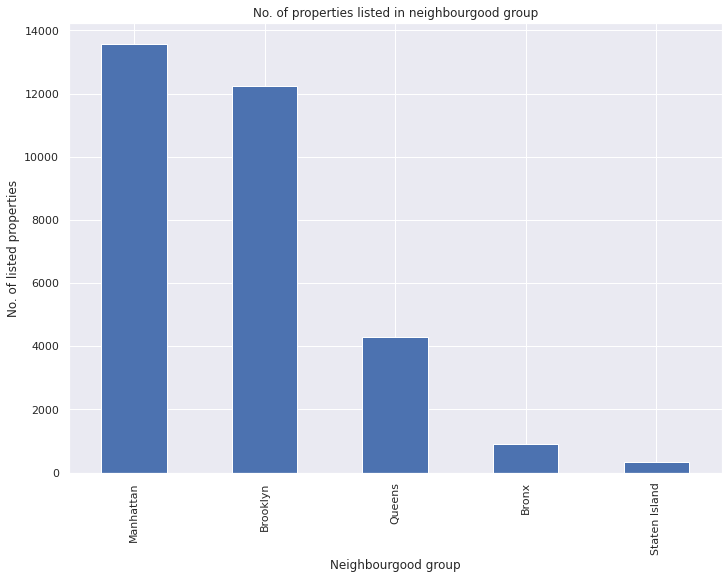

In [62]:
#number of listing at neughbourhood group
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.title('No. of properties listed in neighbourgood group')
plt.xlabel('Neighbourgood group')
plt.ylabel('No. of listed properties')
plt.show()

In [63]:
df.groupby('neighbourhood_group')['price'].max().reset_index()

neighbourhood_group  price
0               Bronx   2500
1            Brooklyn   8000
2           Manhattan  10000
3              Queens   2600
4       Staten Island   5000

Text(0.5, 1.0, 'Top 15 areas that have highest number of listing')

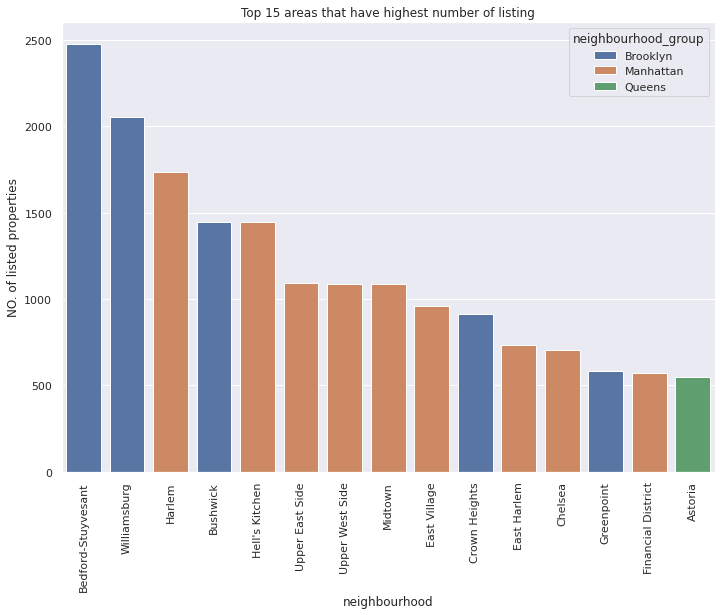

In [64]:
#top planning areas
top_planing_area=df.groupby(['neighbourhood_group']).neighbourhood.value_counts(ascending=True).sort_values(ascending=False).head(15).to_frame('NO. of listed properties').reset_index()
a=sns.barplot(x='neighbourhood',y='NO. of listed properties',hue='neighbourhood_group',data=top_planing_area,dodge = False)
plt.xticks(rotation=90)
a.set_title('Top 15 areas that have highest number of listing')

**1. if we have higher min nights does that mean price per night will be less ( need more analysis) and is there any relation between any columns**

Minimum night and price per night is not corealted.

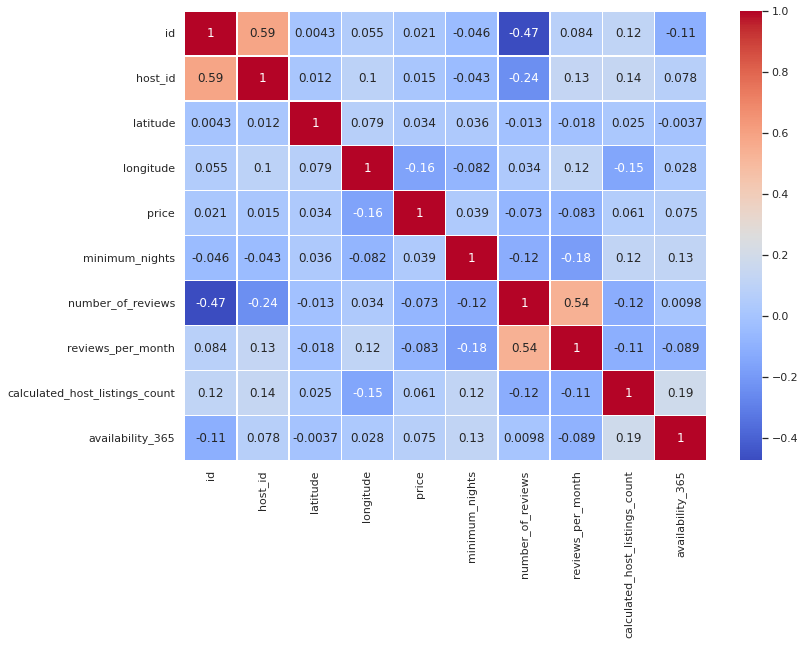

In [65]:
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm',linewidths=.5)

1. No relations is detected from the above graph except review_per_month and no_of_reviews.

Reason : for a room if the no of reviews is greater there are higher chances that reviews_per_month will also be higher

In [66]:
## if we have higher min nights does that mean price per night will be less     
df.groupby(['room_type','minimum_nights'])

In [67]:
minimum_night_price = df.groupby(['room_type','minimum_nights'],
                                 as_index=False)['price'].median()
minimum_night_price.loc[~(minimum_night_price['minimum_nights'] == 999)] 
minimum_night_price.loc[~((minimum_night_price['price'] >= 500) )] 

room_type  minimum_nights  price
0    Entire home/apt               1  160.0
1    Entire home/apt               2  175.0
2    Entire home/apt               3  175.0
3    Entire home/apt               4  179.0
4    Entire home/apt               5  175.0
..               ...             ...    ...
166      Shared room              30   35.0
167      Shared room              31   29.5
168      Shared room              90   25.0
169      Shared room             100   33.0
170      Shared room             999  110.0

[169 rows x 3 columns]

**2. availability 365 is proportional to review per month**

In [68]:
#av_365_rew = df.loc[~((df['reviews_per_month'] == 0))].reset_index()
#av_df.loc[~(df==0).all(axis=1)]
#av_365rew.head(3)
av_365_rew = df.loc[~((df['reviews_per_month'] == 0))].reset_index()
av_365_rew.head(3)

index    id  ... calculated_host_listings_count  availability_365
0      0  2539  ...                              6               365
1      1  2595  ...                              2               355
2      3  3831  ...                              1               194

[3 rows x 16 columns]

In [69]:
av_365_rew=av_365_rew.loc[:,['neighbourhood_group',"neighbourhood",'room_type','reviews_per_month','availability_365']]
av_365_rew.head(3)

neighbourhood_group neighbourhood  ... reviews_per_month  availability_365
0            Brooklyn    Kensington  ...              0.21               365
1           Manhattan       Midtown  ...              0.38               355
2            Brooklyn  Clinton Hill  ...              4.64               194

[3 rows x 5 columns]

In [70]:
av_365_rewi=av_365_rew.groupby(['neighbourhood_group','room_type','availability_365'])['reviews_per_month'].mean().reset_index()
av_365_rewi[av_365_rewi['room_type']=='Private room']

neighbourhood_group     room_type  availability_365  reviews_per_month
187                Bronx  Private room                 1             1.3575
188                Bronx  Private room                 2             1.0000
189                Bronx  Private room                 3             1.3400
190                Bronx  Private room                 5             3.3900
191                Bronx  Private room                 6             2.1000
...                  ...           ...               ...                ...
3120       Staten Island  Private room               360             1.9250
3121       Staten Island  Private room               362             1.1700
3122       Staten Island  Private room               363             3.0875
3123       Staten Island  Private room               364             1.0000
3124       Staten Island  Private room               365             1.7550

[1394 rows x 4 columns]

In [71]:
av_365_req3 = av_365_rewi.loc[((av_365_rewi['neighbourhood_group']=='Bronx') & (av_365_rewi['room_type']=='Entire home/apt'))]

In [72]:
sns.set(rc={'figure.figsize':(30,8.27)}) 
av_365_req3.plot(x='availability_365',y='reviews_per_month',kind='bar',style='o') #for entire hoem/apt at bronx
plt.show()

**3. word used to attract people**

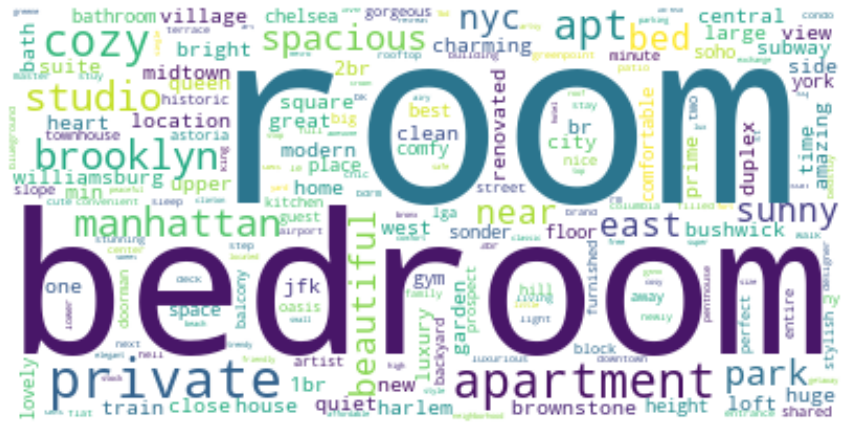

In [79]:
#Creating the text variable
df_name = df[df['name']!=0]
text = " ".join(name for name in df_name.name)
text=text.lower()

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
sns.set(rc={'figure.figsize':(15,11)})
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**4) does no of review affect the price**

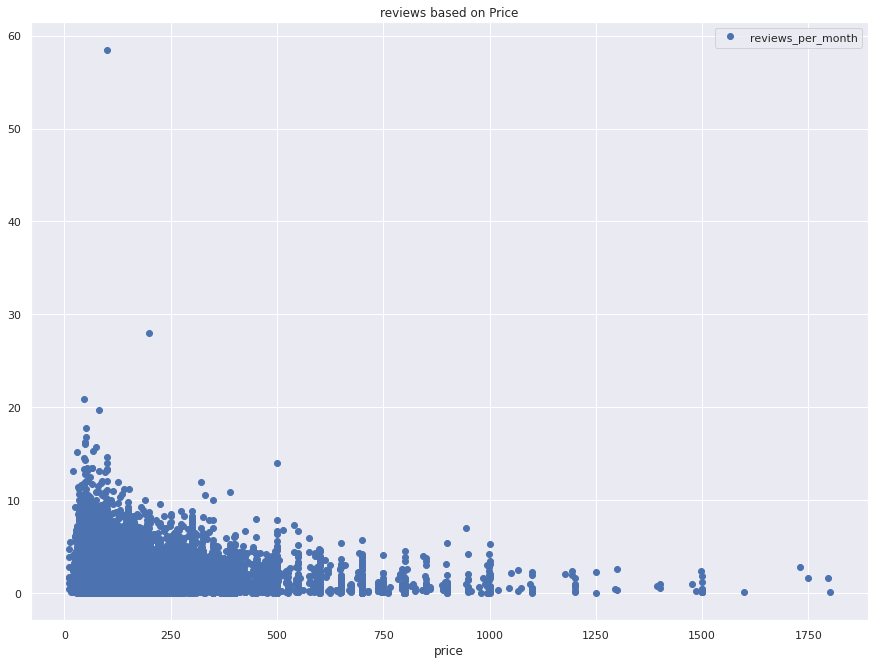

In [80]:
price_review = df[['reviews_per_month', 'price']].sort_values(by = 'price')
price_review=price_review.loc[price_review['reviews_per_month']>0]
price_review=price_review.loc[price_review['price']<2000]
price_review.plot(x = 'price', y = 'reviews_per_month', 
                  style = 'o',
                  title = 'reviews based on Price')

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7f7c03ad3e90>>

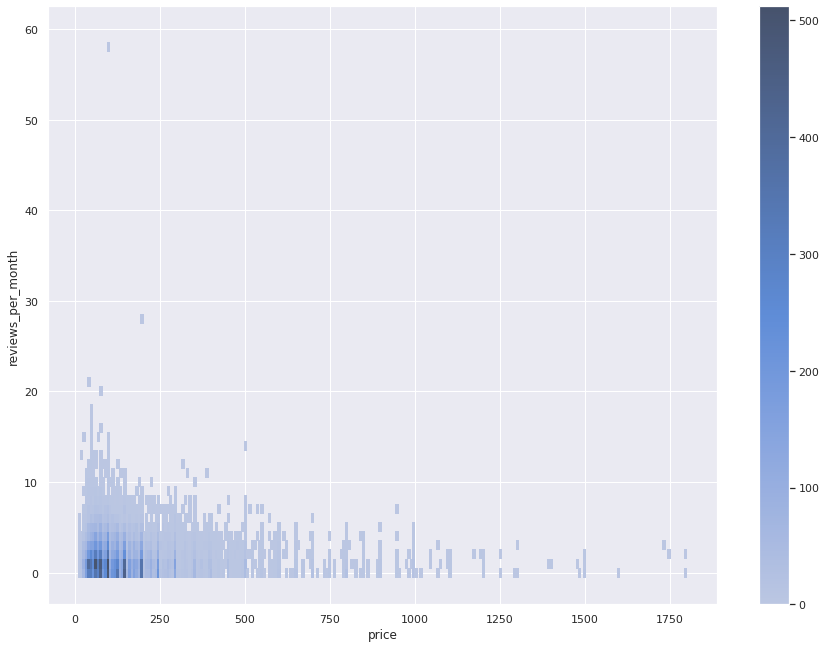

In [81]:
sns.histplot(data = price_review, x = 'price', y = 'reviews_per_month',discrete=(False,True),cbar=True).set

Observations

1. review per month of price range between 0 & 250 is more by which we can conclude that most people prefer renting rooms which have a price below 250

2. reviews per month decrease as you increase the price

**5) Which neighbourhood is most expensive in NewYork City? (at each neighbourhood-group)**

1. At manhattan, Tribecca and flatiron district.
2. At brooklyn, Dumbo
3. At Bronx, Riverdale
4. At queens, ponsit
5. At Staten Island, Fort wastword minimum and maximum price neighbourhood wise

In [82]:
nei_max = df.groupby(['neighbourhood_group','neighbourhood'])['price'].max().reset_index()
nei_min =df.groupby(['neighbourhood_group','neighbourhood'])['price'].min().reset_index()
nei_avg =df.groupby(['neighbourhood_group','neighbourhood'])['price'].median().reset_index()

**find out number of airbnb acomodation facility at neighboorhood of manhattan**

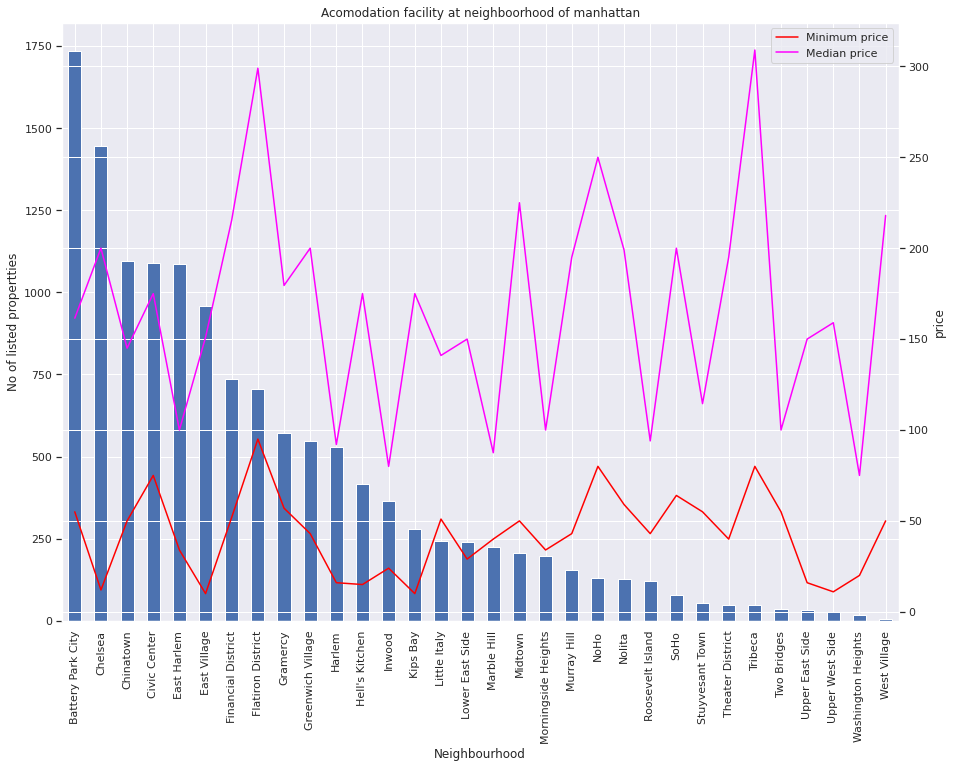

Number of neighborhoods in Manhattan where rental housing is listed: 32


In [83]:
man_data = df[df['neighbourhood_group'] == 'Manhattan']
man_ax1 = man_data['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation facility at neighboorhood of manhattan')
ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Manhattan'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Manhattan'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Manhattan'])
plt.legend(loc='upper right') #set legend position
plt.title('')
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing is listed: {man_data["neighbourhood"].nunique()}')

**find out number of airbnb acomodation facility at neighboorhood of manhattan depend on room type private room**

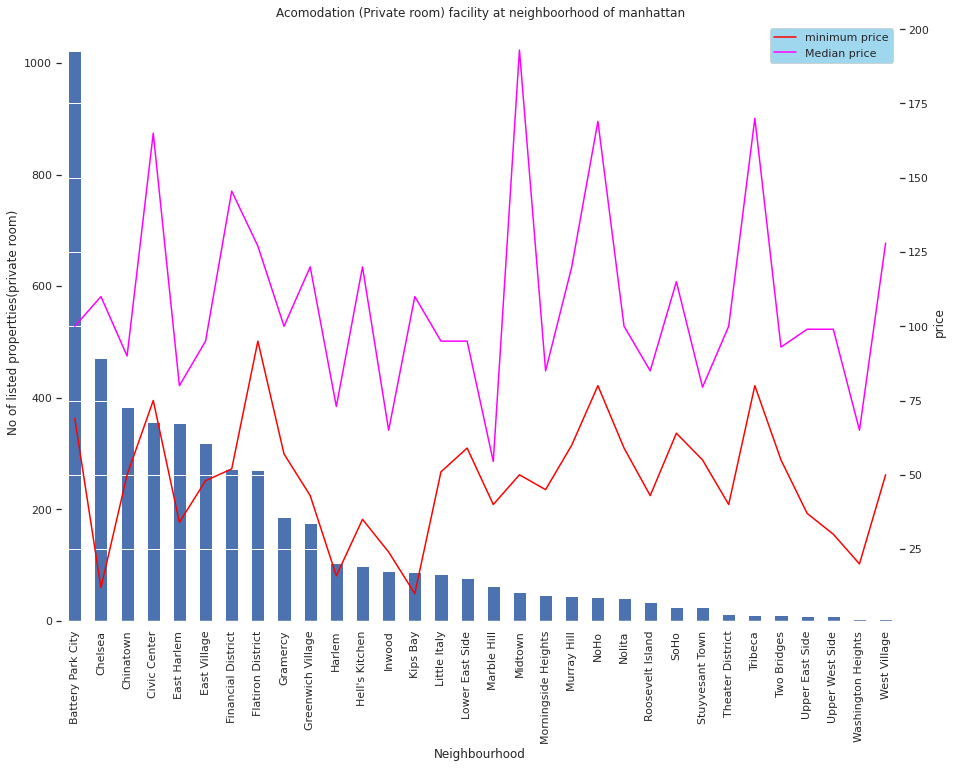

Number of neighborhoods in Manhattan where rental housing (private room) is listed: 32


In [85]:
plt.rcParams['axes.facecolor'] = 'skyblue'
pri_room = man_data[man_data['room_type']=='Private room']
man_ax1 = pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of manhattan')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
man_ax1.set_facecolor('xkcd:white')
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing (private room) is listed: {pri_room["neighbourhood"].nunique()}')

**find out number of airbnb acomodation facility at neighboorhood of manhattan depend on room type Entire home/apt**

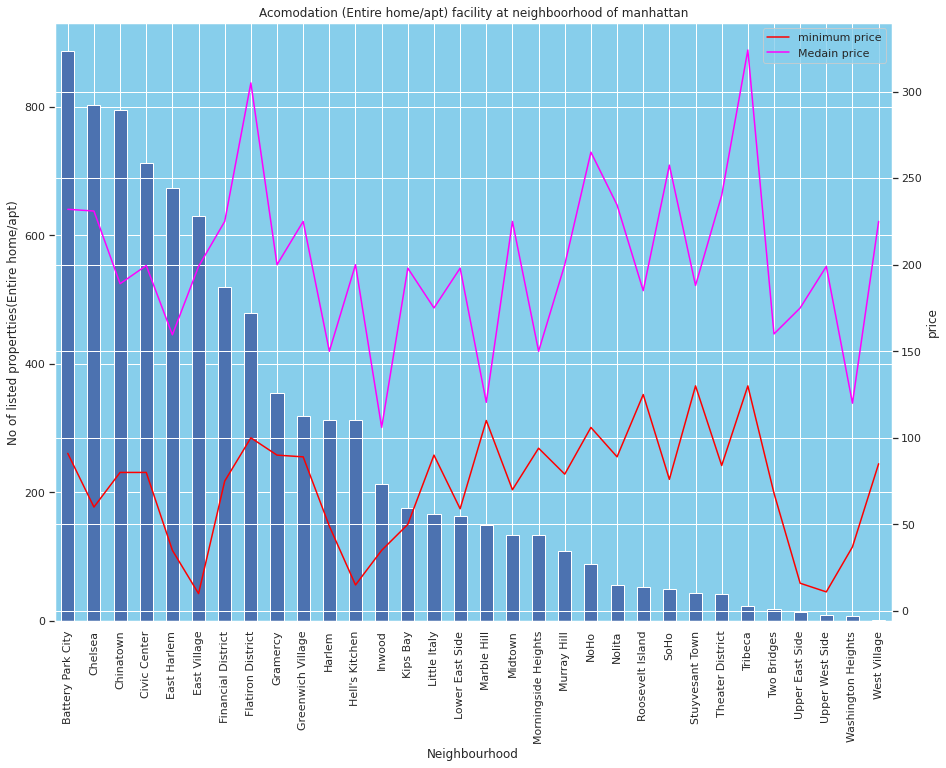

Number of neighborhoods in Manhattan where rental housing (Entire home/apt) is listed: 32


In [86]:
apt_room = man_data[man_data['room_type']=='Entire home/apt']
man_ax1 = apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of manhattan')
                                                     
ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Medain price',
             data=apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing (Entire home/apt) is listed: {apt_room["neighbourhood"].nunique()}')

**find out number of airbnb acomodation facility at neighboorhood of manhattan depend on room type Shared room**

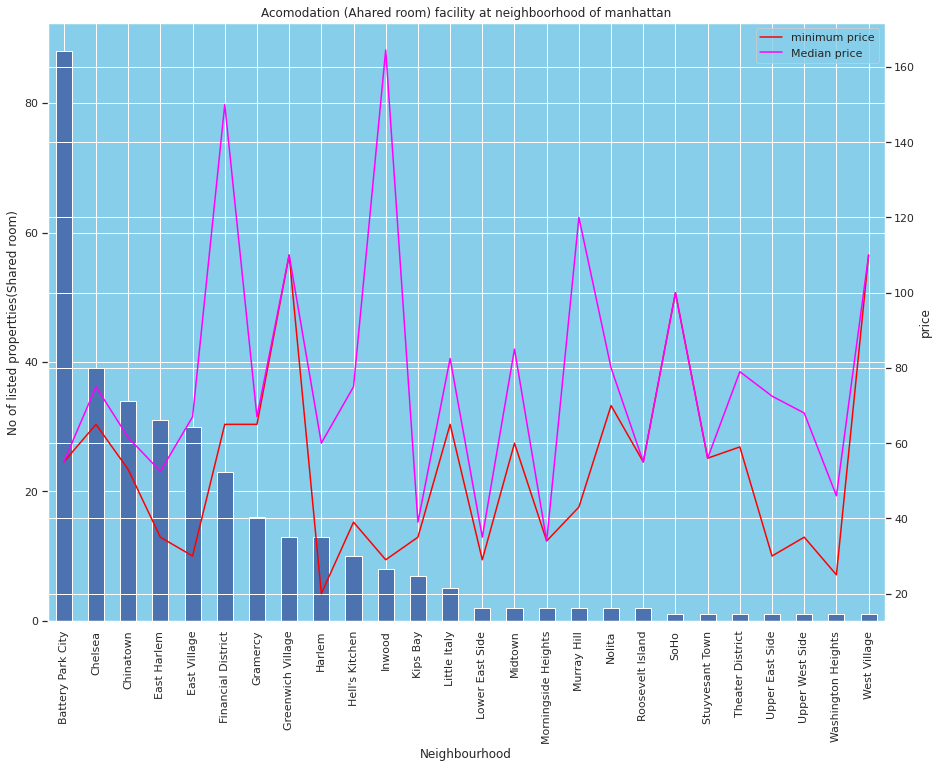

Number of neighborhoods in Manhattan where rental housing (shared room) is listed: 26


In [87]:
shr_room = man_data[man_data['room_type']=='Shared room']
man_ax1 = shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Ahared room) facility at neighboorhood of manhattan')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing (shared room) is listed: {shr_room["neighbourhood"].nunique()}')

**find out number of airbnb acomodation facility at neighboorhood of Brooklyn**

In [88]:
brooklyn_data = df[df['neighbourhood_group'] == 'Brooklyn']
sns.set(rc={'figure.figsize':(11.7,8.27)})
bro_ax1 =brooklyn_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of listed propertties',
                                              xlabel='Neighbourhood',
                                              title='Acomodation facility at neighboorhood of Brooklyn')
ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Brooklyn'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Brooklyn'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Brooklyn'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Brooklyn where rental housing is listed: {brooklyn_data["neighbourhood"].nunique()}')

Number of neighborhoods in Brooklyn where rental housing is listed: 47


**find out number of airbnb acomodation facility at neighboorhood of Brooklyn depend on room type private room**

In [89]:
b_pri_room = brooklyn_data[brooklyn_data['room_type']=='Private room']
bro_ax1 = b_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Brooklyn')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Brooklyn where rental housing (private room) is listed: {b_pri_room["neighbourhood"].nunique()}')

Number of neighborhoods in Brooklyn where rental housing (private room) is listed: 45


**find out number of airbnb acomodation facility at neighboorhood of Brooklyn depend on room type entire apt**

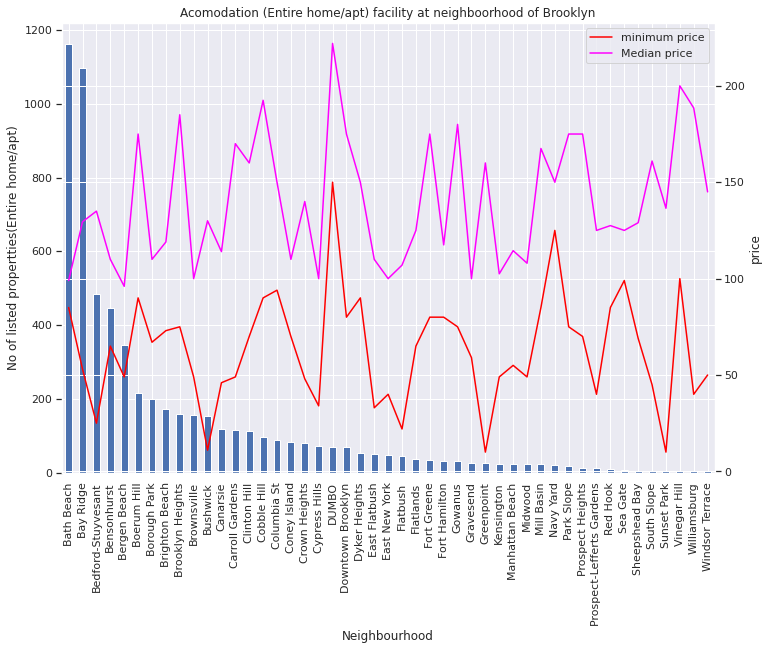

Number of neighborhoods in Brooklyn where rental housing (entire home/apt) is listed: 47


In [90]:
b_apt_room = brooklyn_data[brooklyn_data['room_type']=='Entire home/apt']
man_ax1 =b_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Brooklyn')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Brooklyn where rental housing (entire home/apt) is listed: {b_apt_room["neighbourhood"].nunique()}')

**find out number of airbnb acomodation facility at neighboorhood of Brooklyn depend on room type shared room**

In [91]:
b_apt_room = brooklyn_data[brooklyn_data['room_type']=='Shared room']
bro_ax1 =b_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Shared room) facility at neighboorhood of Brooklyn')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Brooklyn where rental housing (shared room) is listed: {b_apt_room["neighbourhood"].nunique()}')

Number of neighborhoods in Brooklyn where rental housing (shared room) is listed: 29


**find out number of airbnb acomodation facility at neighboorhood of Queens**

In [92]:
Queens_data = df[df['neighbourhood_group'] == 'Queens']
sns.set(rc={'figure.figsize':(11.7,8.27)})
que_ax1 = Queens_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of rented listed propertties',
                                              xlabel='Neighbourhood',
                                              title='Acomodation facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
"""sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Queens'])"""
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Queens'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Queens'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing is listed: {Queens_data["neighbourhood"].nunique()}')

Number of neighborhoods in Queens where rental housing is listed: 51


**find out number of airbnb acomodation facility at neighboorhood of Queens depend on room type private room**

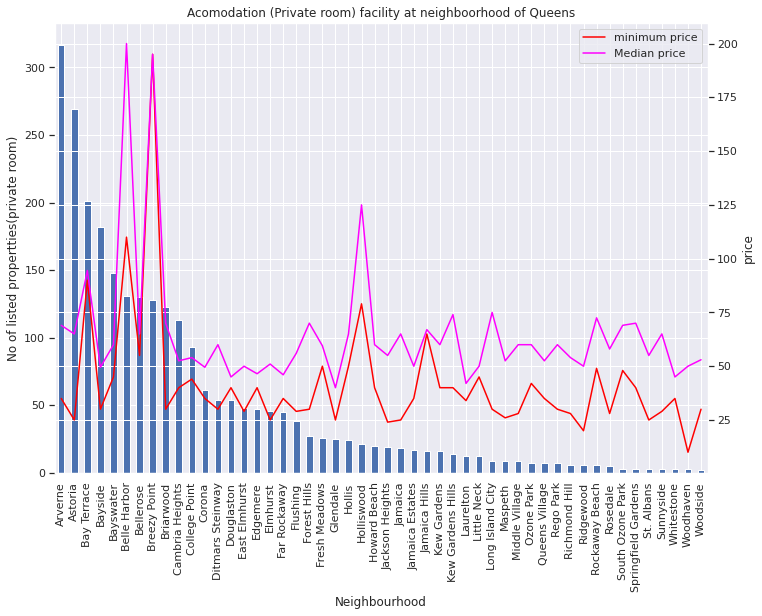

Number of neighborhoods in Queens where rental housing (private room) is listed: 50


In [93]:
queens_pri_room = Queens_data[Queens_data['room_type']=='Private room']
que_ax1 = queens_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing (private room) is listed: {queens_pri_room["neighbourhood"].nunique()}')

**find out number of airbnb acomodation facility at neighboorhood of Queens depend on room type Entire home/apt**

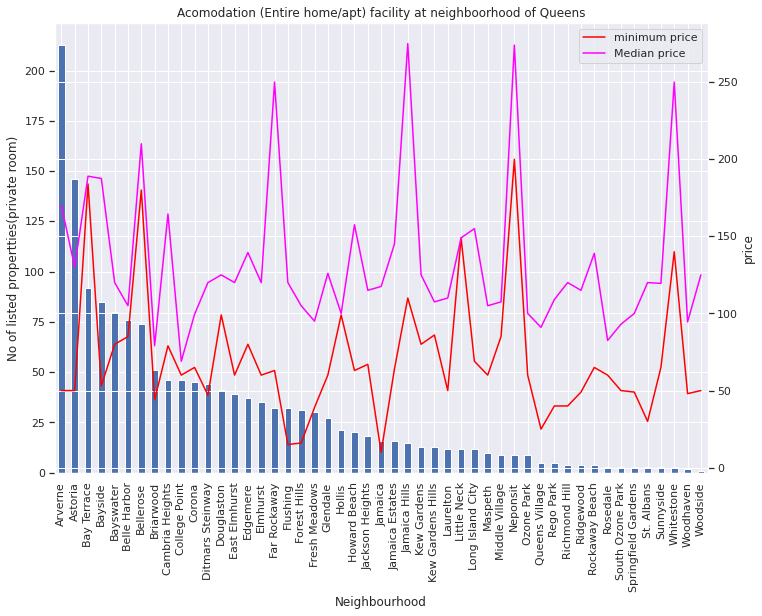

Number of neighborhoods in Queens where rental housing (entire home/apt) is listed: 49


In [94]:
queens_ent_room = Queens_data[Queens_data['room_type']=='Entire home/apt']
que_ax1 = queens_ent_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=queens_ent_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=queens_ent_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing (entire home/apt) is listed: {queens_ent_room["neighbourhood"].nunique()}')

**find out number of airbnb acomodation facility at neighboorhood of Queens depend on room type Shared room**

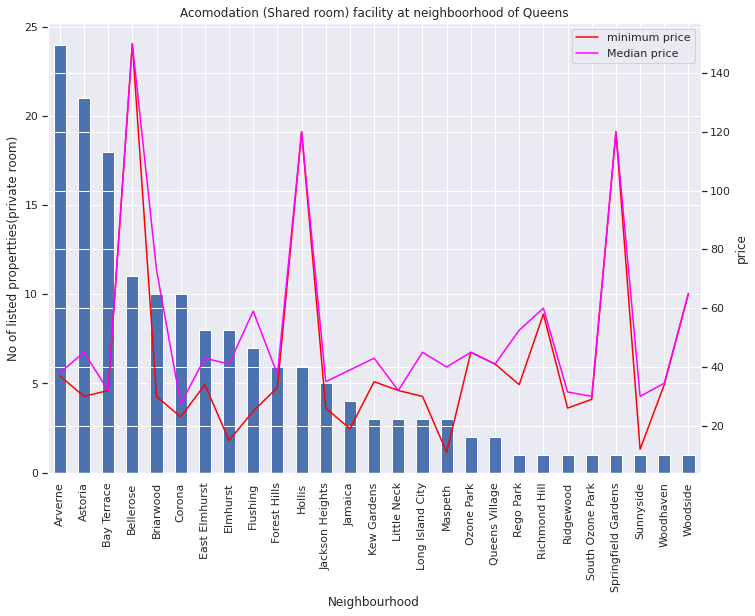

Number of neighborhoods in Queens where rental housing (shared room) is listed: 27


In [95]:
queens_shr_room = Queens_data[Queens_data['room_type']== 'Shared room']
que_ax1 = queens_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Shared room) facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=queens_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=queens_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=queens_shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing (shared room) is listed: {queens_shr_room["neighbourhood"].nunique()}')

**find out number of airbnb acomodation facility at neighboorhood of Bronx**

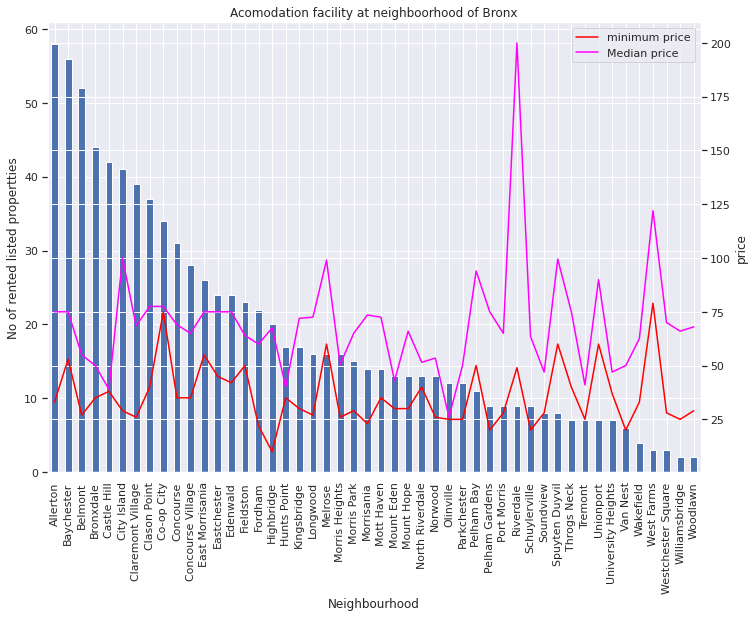

Number of neighborhoods in Bronx where rental housing is listed: 48


In [96]:
bronx_data = df[df['neighbourhood_group'] == 'Bronx']
bro_ax1 = bronx_data['neighbourhood'].value_counts().plot(kind="bar",
                                                          ylabel='No of rented listed propertties',
                                                          xlabel='Neighbourhood',
                                                          title='Acomodation facility at neighboorhood of Bronx')
ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Bronx'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Bronx'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Bronx'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing is listed: {bronx_data["neighbourhood"].nunique()}')

**find out number of airbnb acomodation facility at neighboorhood of Bronx depend on room type private room**

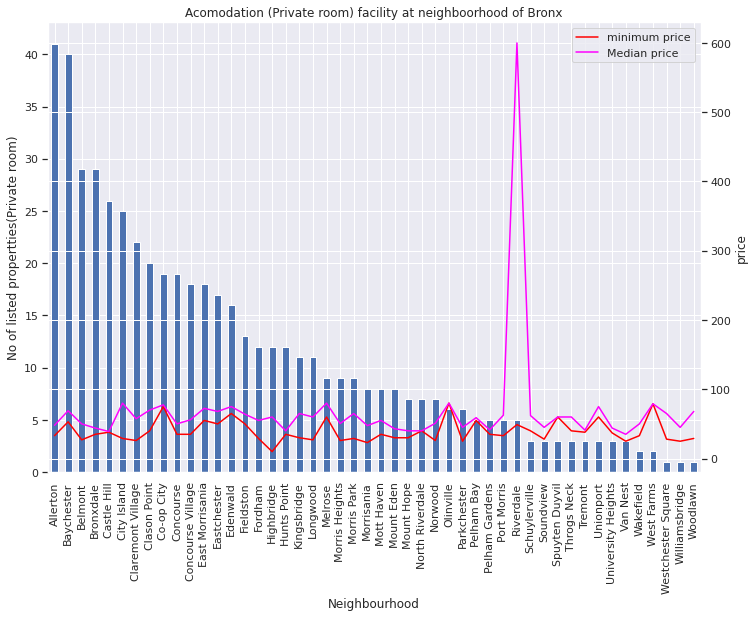

Number of neighborhoods in Bronx where rental housing (private room) is listed: 48


In [97]:
bronx_pri_room = bronx_data[bronx_data['room_type']=='Private room']
bronx_ax1 =bronx_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Bronx')

ax2 = bronx_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing (private room) is listed: {bronx_pri_room["neighbourhood"].nunique()}')

**find out number of airbnb acomodation facility at neighboorhood of Bronx depend on room type Entire apt**

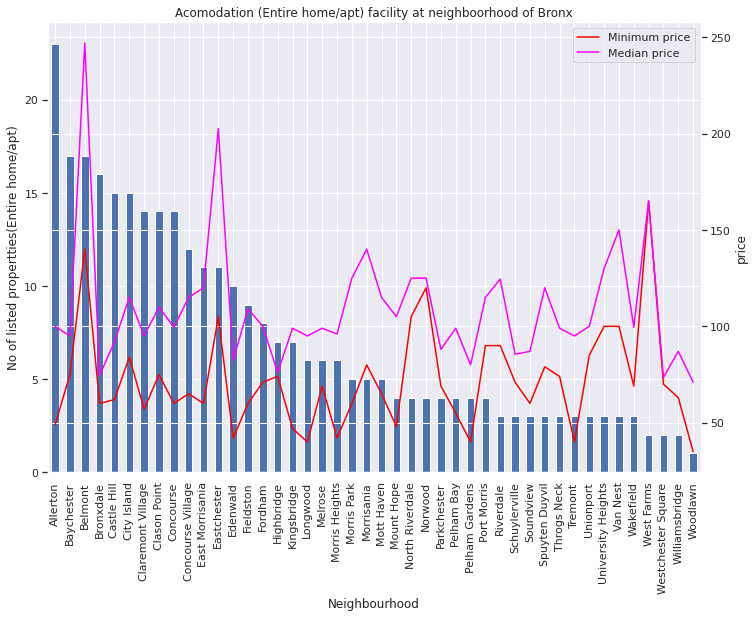

Number of neighborhoods in Bronx where rental housing (entire home/apt) is listed: 44


In [98]:
bronx_apt_room = bronx_data[bronx_data['room_type']=='Entire home/apt']
bro_ax1 =bronx_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Bronx')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing (entire home/apt) is listed: {bronx_apt_room["neighbourhood"].nunique()}')

**find out number of airbnb acomodation facility at neighboorhood of Bronx depend on room type shared room**

In [99]:
bronx_shr_room = bronx_data[bronx_data['room_type']=='Shared room']
bronx_ax1 =bronx_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                               ylabel='No of listed propertties(Shared room)',
                                                               xlabel='Neighbourhood',
                                                               title='Acomodation (Shared room) facility at neighboorhood of Bronx')

ax2 = bronx_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='Maximum price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing (shared room) is listed: {bronx_shr_room["neighbourhood"].nunique()}')

Number of neighborhoods in Bronx where rental housing (shared room) is listed: 20


**find out number of airbnb acomodation facility at neighboorhood of Staten Island**

In [100]:
staten_is_data = df[df['neighbourhood_group'] == 'Staten Island']

sta_ax1 = staten_is_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of rented listed propertties',
                                              xlabel='Neighbourhood',
                                              title='Acomodation facility at neighboorhood of Staten Island')
ax2 = sta_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='Maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Staten Island'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Staten Island'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Staten Island'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing is listed: {staten_is_data["neighbourhood"].nunique()}')

Number of neighborhoods in Staten Island where rental housing is listed: 40


**find out number of airbnb acomodation facility at neighboorhood of Staten Island depend on room type Private room**

In [101]:
staten_pri_room = staten_is_data[staten_is_data['room_type']=='Private room']
staten_ax1 =staten_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Staten Island')

ax2 = staten_ax1.twinx() # create axis 2 for prrice listing
"""sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())"""
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=staten_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=staten_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing (private room) is listed: {staten_pri_room["neighbourhood"].nunique()}')

Number of neighborhoods in Staten Island where rental housing (private room) is listed: 31


**find out number of airbnb acomodation facility at neighboorhood of Staten Island depend on room type Entire home/apt**

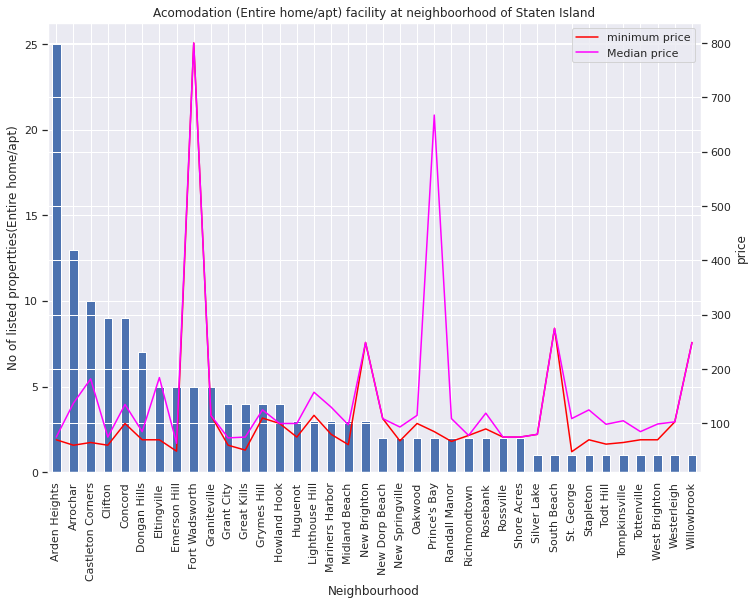

Number of neighborhoods in Staten Island where rental housing (entire home/apt) is listed: 38


In [102]:
staten_apt_room = staten_is_data[staten_is_data['room_type']=='Entire home/apt']
staten_ax1 =staten_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Staten Island')

ax2 = staten_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=staten_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=staten_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing (entire home/apt) is listed: {staten_apt_room["neighbourhood"].nunique()}')

**find out number of airbnb acomodation facility at neighboorhood of Staten Island depend on room type Shared room**

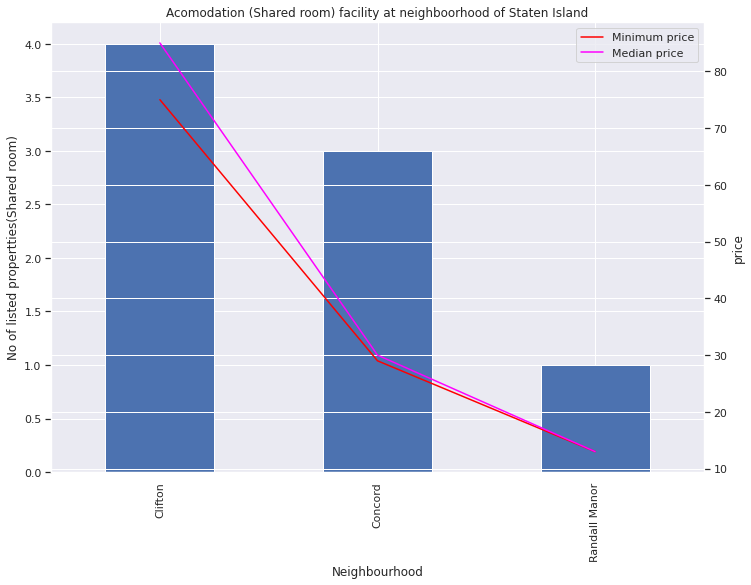

Number of neighborhoods in Staten Island where rental housing (shared room) is listed: 3


In [103]:
staten_shr_room = staten_is_data[staten_is_data['room_type']=='Shared room']
staten_ax1 =staten_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Shared room) facility at neighboorhood of Staten Island')

ax2 = staten_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing (shared room) is listed: {staten_shr_room["neighbourhood"].nunique()}')

**6. geo map (Is there any noticeable difference of traffic among different areas and what could be the reason for it?)**

manhattan finicial district has most number of traffic among different neighbourhood group.The district comprises the offices and headquarters of many of the city's major financial institutions, including the New York Stock Exchange and the Federal Reserve Bank of New York. Anchored on Wall Street in the Financial District, New York City has been called both the most financially powerful city and the leading financial center of the world

In [104]:
#to create price heat map on map we can use latitude and longitude
listing = df.loc[:,['longitude','latitude','price','availability_365']]
listing.head(3)

longitude  latitude  price  availability_365
0  -73.97237  40.64749    149               365
1  -73.98377  40.75362    225               355
2  -73.94190  40.80902    150               365

Text(0.5, 1.0, 'Density of rooms')

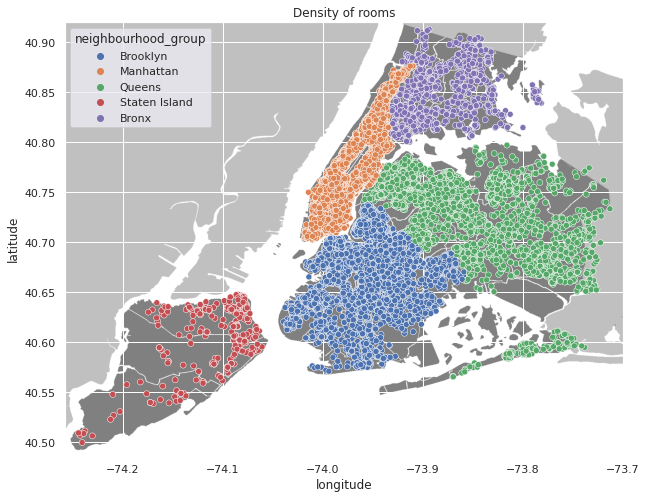

In [105]:
data = df[["latitude","longitude",'neighbourhood_group']]
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#adding the image from wikipedia
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
#reading the image
image=plt.imread(img)
#scaling img with max latitude and logtitude and makeig some minor adgustment to fit the points
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
#creating an scaterplot
sns.scatterplot(data = data,x='longitude',y='latitude',hue='neighbourhood_group').set_title('Density of rooms')

In [106]:
import urllib
sns.set(rc={'figure.figsize':(11.7,8.27)}) 
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
listing.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

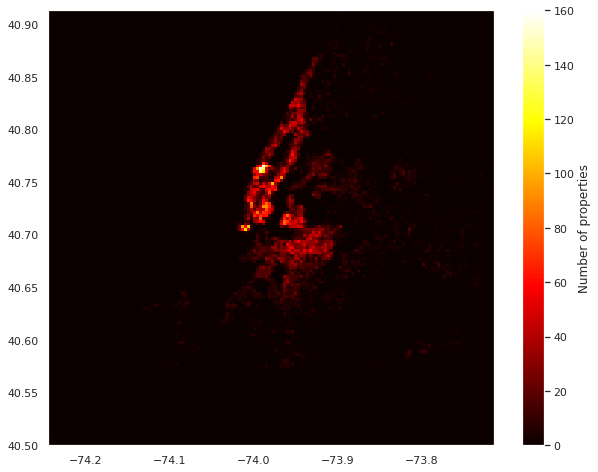

In [107]:
plt.figure(figsize = (10,8))
plt.hist2d(df.longitude, df.latitude, bins=150, cmap='hot')
plt.colorbar().set_label('Number of properties')

In [108]:
import folium
from folium.plugins import HeatMap
from folium import plugins

In [109]:
map_NYC = folium.Map([40.80902,-73.94190],zoom_start=7)

In [110]:
station = df[['latitude','longitude']]
# convert to (n, 2) nd-array format for heatmap
stationArr = station.values

# plot heatmap
map_NYC.add_child(plugins.HeatMap(stationArr, radius=15))
map_NYC

Out of all the listings, Manhattan has 43% and Brooklyn has 39% of listings. This might be because Manhattan is the economic heart of the city, with a huge no of skyscrapers containing countless offices and world-famous tourist attractions such as Times Square, 5th Ave, The Central Park, and for business in wall street for stock exchange. and because of its importance, it has high prices and has large hotel density in and near manhattan is more which state that people like to stay near manhattan to avoid traffic and time delay to work

**7. Graph of host which are inactive**

Total no of hosts present = 17541
Total host which are active = 31354
Total hosts which are inactive =17533


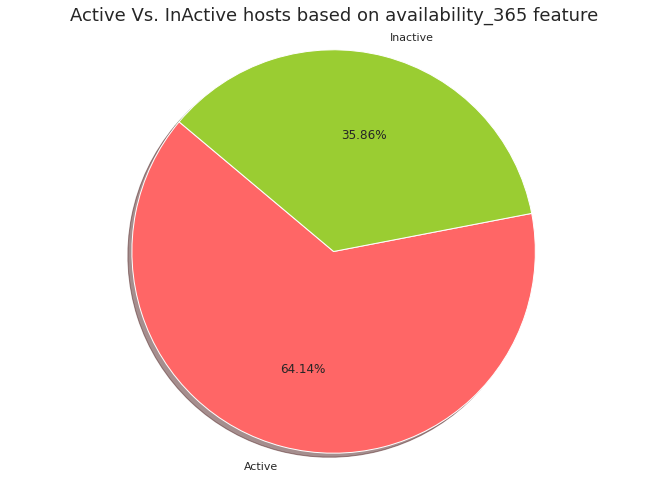

In [111]:
total_hosts = len(df_del)
active_hosts = len(df)
inactive_hosts = len(df_with_na[df_with_na['availability_365'] == 0])


print(f"Total no of hosts present = {total_hosts}")
print(f"Total host which are active = {active_hosts}")
print(f"Total hosts which are inactive ={inactive_hosts}")


labels = 'Active', 'Inactive'
sizes = [active_hosts, inactive_hosts]
colors = ['#ff6666', 'yellowgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Active Vs. InActive hosts based on availability_365 feature", fontsize=18)
plt.show()

In [112]:
df_with_na_neighbourhood_group = df_with_na.neighbourhood_group.value_counts().rename_axis('neighbourhood_group').reset_index(name='counts')

In [113]:
df_with_na_neighbourhood_group

neighbourhood_group  counts
0           Manhattan   21661
1            Brooklyn   20104
2              Queens    5666
3               Bronx    1091
4       Staten Island     373

In [114]:
df_del_neighbourhood_group= df_del.neighbourhood_group.value_counts().rename_axis('neighbourhood_group').reset_index(name='counts')
df_del_neighbourhood_group

neighbourhood_group  counts
0           Manhattan    8102
1            Brooklyn    7851
2              Queens    1368
3               Bronx     178
4       Staten Island      42

In [115]:
#merge count value dataframe
df_merge_neighbourhood_group = pd.merge(df_with_na_neighbourhood_group,
                                        df_del_neighbourhood_group,
                                        on='neighbourhood_group')
df_merge_neighbourhood_group.rename(columns={'counts_x': 'Total number of listing',
                                             'counts_y': 'Inactive listing'},inplace=True)
df_merge_neighbourhood_group

neighbourhood_group  Total number of listing  Inactive listing
0           Manhattan                    21661              8102
1            Brooklyn                    20104              7851
2              Queens                     5666              1368
3               Bronx                     1091               178
4       Staten Island                      373                42

In [116]:
df_merge_neighbourhood_group.plot.bar(x='neighbourhood_group')
plt.ylabel('No of listing')
plt.title('Inactive host in each neighbourhood group')
plt.show()

**8. buisest host**

In [117]:
#df.groupby(['availability_365','reviews_per_month']) and df['availability_365'>= 100]
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
av_365 = df.loc[~((df['availability_365'] <= 200) | (df['calculated_host_listings_count']<=50)| (df['reviews_per_month'] == 0))].reset_index()
av_365=av_365.groupby(["host_id",'host_name','calculated_host_listings_count'],as_index=False)['reviews_per_month','availability_365'].mean()
av_365.sort_values(['calculated_host_listings_count'],ascending=False,inplace=True)
av_365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


host_id          host_name  ...  reviews_per_month  availability_365
10  219517861       Sonder (NYC)  ...           1.992514        311.267760
7   107434423         Blueground  ...           0.216667        295.041667
5    30283594               Kara  ...           0.091111        345.555556
8   137358866             Kazuya  ...           0.443684        241.473684
2    12243051             Sonder  ...           0.304074        306.000000
3    16098958     Jeremy & Laura  ...           0.122456        309.912281
6    61391963  Corporate Housing  ...           0.297255        313.039216
4    22541573                Ken  ...           0.113333        337.111111
9   200380610            Pranjal  ...           1.000000        342.000000
0     1475015               Mike  ...           0.088780        340.341463
1     7503643               Vida  ...           0.099535        328.744186

[11 rows x 5 columns]

In [118]:
av_365.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 10 to 1
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         11 non-null     int64  
 1   host_name                       11 non-null     object 
 2   calculated_host_listings_count  11 non-null     int64  
 3   reviews_per_month               11 non-null     float64
 4   availability_365                11 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 528.0+ bytes


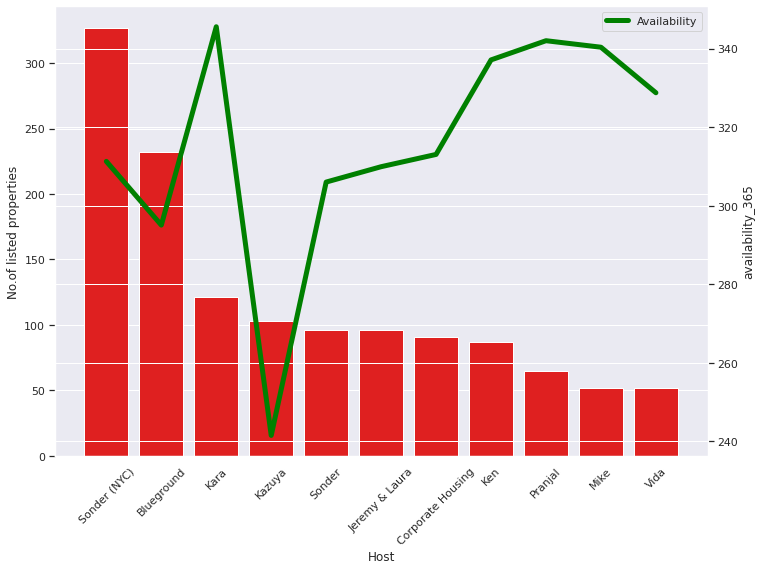

In [119]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #set figure size
ax_ava = sns.barplot(x="host_name",
                 y="calculated_host_listings_count", 
                 data=av_365,color="red")

ax_ava.set(ylabel="No.of listed properties",
           xlabel="Host")
plt.xticks(rotation=45)

ax2_ava = ax_ava.twinx() # create axis 2 for prrice listing
ax2_ava = sns.lineplot(x='host_name', 
             y='availability_365',
             color='green',
             label='Availability',
             linewidth=5,
             data=av_365)
ax2_ava.legend(ncol=2, 
               loc="upper right")
plt.show()

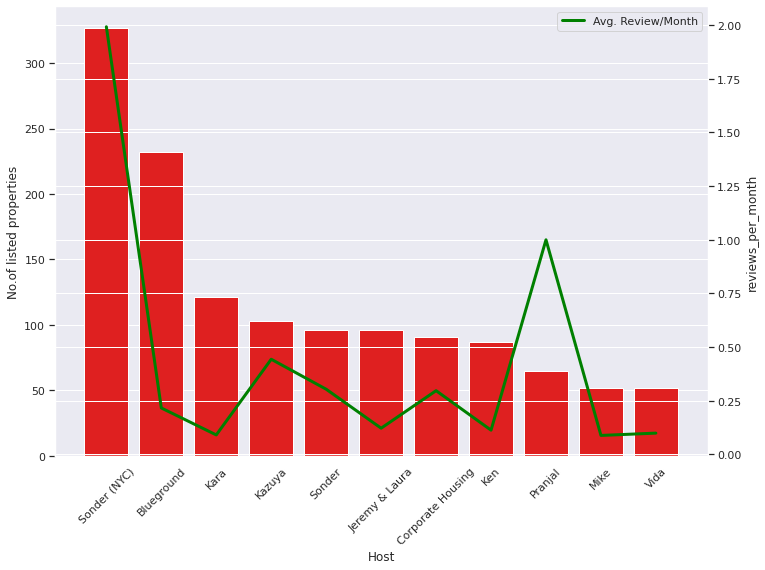

In [120]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #set figure size
ax_rev = sns.barplot(x="host_name",
                 y="calculated_host_listings_count",
                 data=av_365,color="red")
plt.xticks(rotation=45)

ax_rev.set(ylabel="No.of listed properties",
       xlabel="Host")
ax2_rev = ax_rev.twinx() # create axis 2 for reviews_per_month

ax2_rev = sns.lineplot(x='host_name', 
             y='reviews_per_month',
             color='green',
             label='Avg. Review/Month',
             lw=3,
             data=av_365)
ax2_rev.legend(ncol=2, loc="upper right")
plt.show()

In [121]:
#extracting list of top 10 most busy host by sum of reviews per month
top_10_review_host_list=df.groupby(['host_id']).agg({'reviews_per_month':'sum','price':'median'}).sort_values('reviews_per_month',ascending=False).reset_index()[:10]['host_id'].tolist()
# making a df for top 10 hosts 
top_10_review_host=df[df.host_id.isin(top_10_review_host_list)]
top_10_review_host['host_name_id']=top_10_review_host['host_name']+' ('+top_10_review_host['host_id'].map(str)+')'
top_10_review_host['neighbourhood'] = top_10_review_host['neighbourhood'] +' (' + top_10_review_host['neighbourhood_group'] + ')'

#grouping the values by host name and taking total of reviews per month
temp_top_10_review_host=top_10_review_host.groupby('host_name_id').agg({'reviews_per_month':'sum','price':'median'}).sort_values('reviews_per_month',ascending=False).reset_index()
temp_top_10_review_host=temp_top_10_review_host.rename(columns={'reviews_per_month':'total_reviews_per_month','price':'median price'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


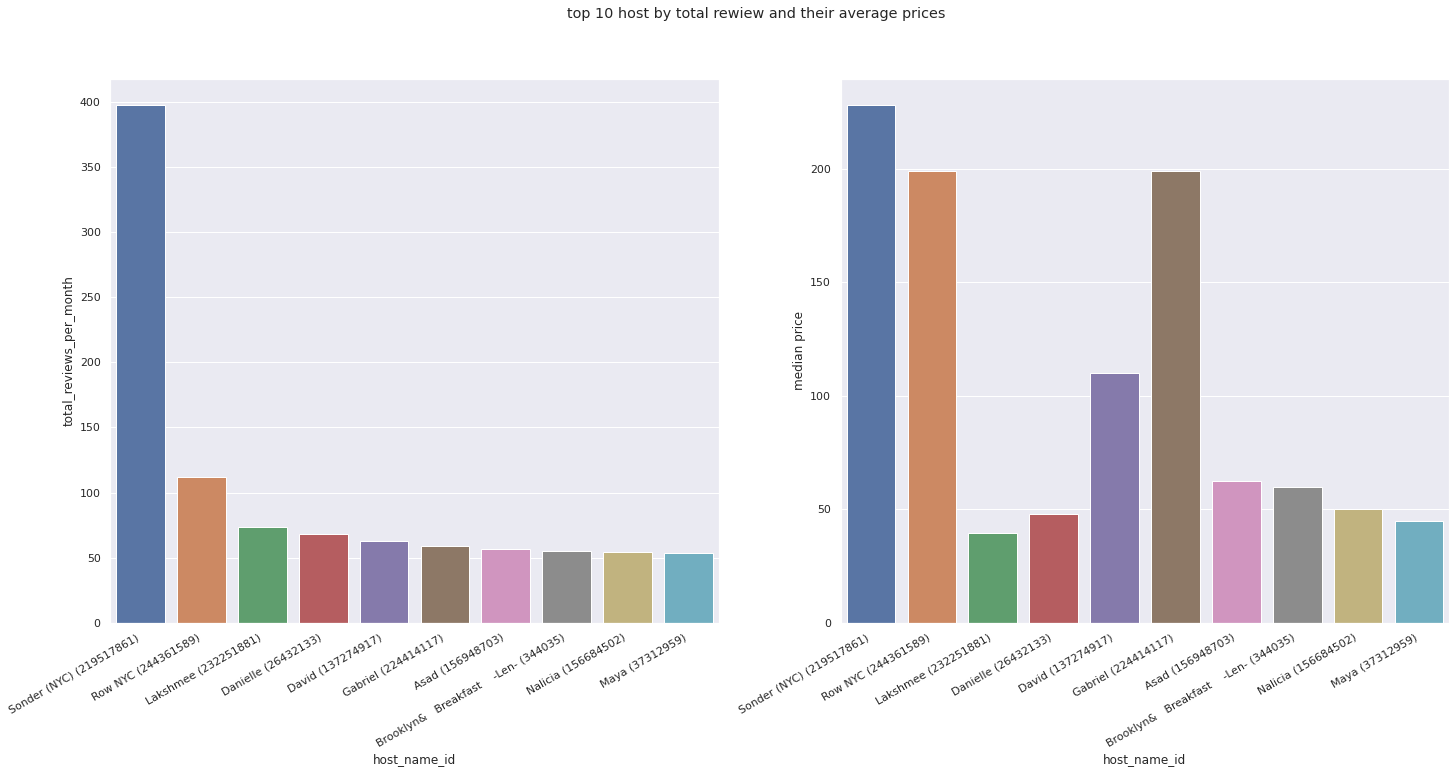

In [122]:
fig, axes = plt.subplots(1,2, figsize=(24, 10))
fig.suptitle('top 10 host by total rewiew and their average prices ')
#ploting a graph of host name vs total reviews per month
sns.barplot(ax=axes[0],x="host_name_id", y='total_reviews_per_month' ,data=temp_top_10_review_host)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')
#ploting a graph of host name vs  median price
sns.barplot(ax=axes[1],x='host_name_id',y='median price',data=temp_top_10_review_host)
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')
plt.show()

In [123]:
top_10_review_host

id  ...                             host_name_id
7086    5115372  ...                      Danielle (26432133)
9323    7125107  ...                          Maya (37312959)
9689    7453537  ...  Brooklyn&   Breakfast    -Len- (344035)
10420   7979237  ...  Brooklyn&   Breakfast    -Len- (344035)
10544   8097567  ...  Brooklyn&   Breakfast    -Len- (344035)
...         ...  ...                                      ...
47691  35871510  ...                 Sonder (NYC) (219517861)
47692  35871511  ...                 Sonder (NYC) (219517861)
47693  35871515  ...                 Sonder (NYC) (219517861)
47814  35936418  ...                 Sonder (NYC) (219517861)
47821  35937891  ...                 Sonder (NYC) (219517861)

[415 rows x 16 columns]

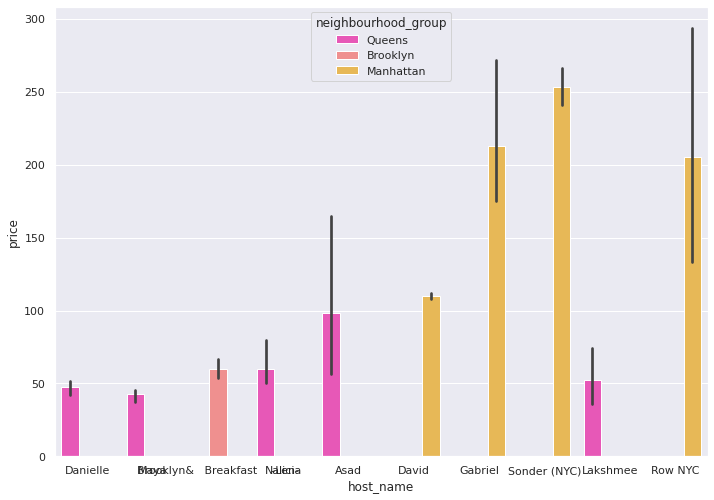

In [126]:
sns.barplot(x='host_name', y='price', data=top_10_review_host, hue='neighbourhood_group', palette='spring')
plt.show()

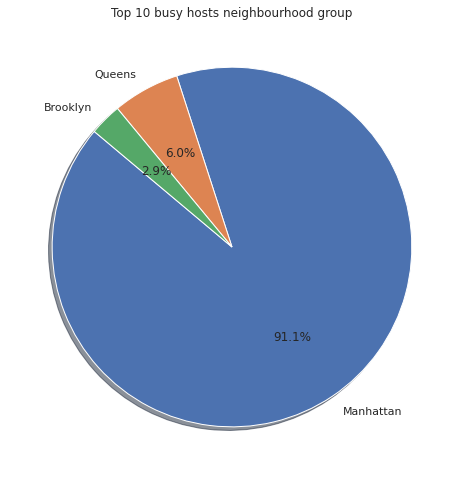

In [127]:
label=top_10_review_host['neighbourhood_group'].value_counts().index.to_list()
plt.pie(top_10_review_host['neighbourhood_group'].value_counts(),labels=label, autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("Top 10 busy hosts neighbourhood group")
plt.show()

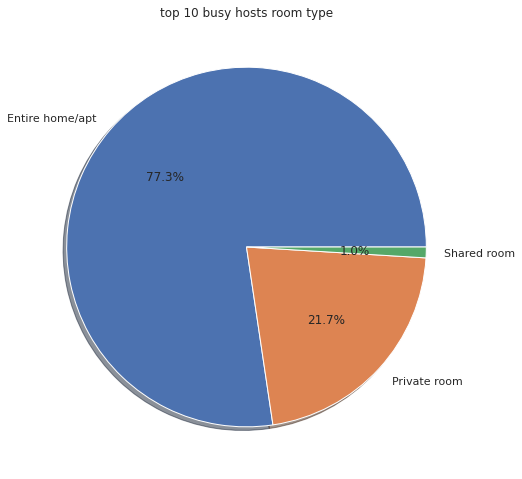

In [128]:
label=top_10_review_host['room_type'].value_counts().index.to_list()
plt.pie(top_10_review_host['room_type'].value_counts(),labels=label, autopct='%1.1f%%',shadow=True)
plt.title("top 10 busy hosts room type")
plt.show()

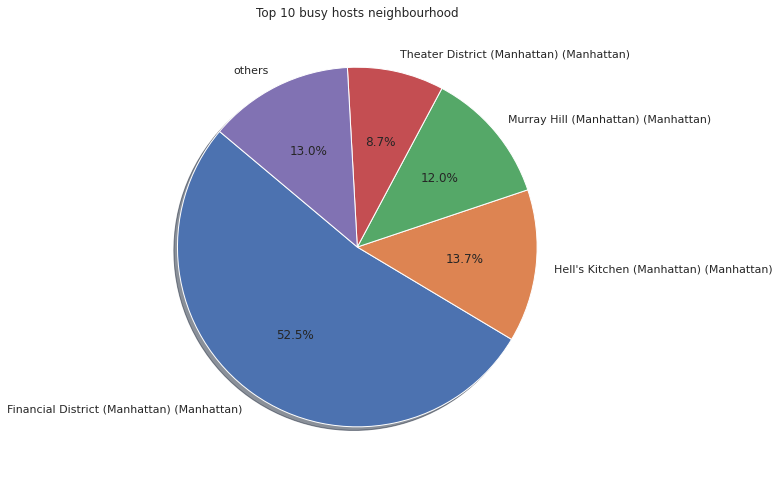

In [129]:
#the full dataframe
df_pie=top_10_review_host.copy()
df_pie['neighbourhood']=top_10_review_host['neighbourhood'] + ' ('+ top_10_review_host['neighbourhood_group']+')'
df_pie = df_pie['neighbourhood'].value_counts().reset_index().rename(columns={"index": "neighbourhood", "neighbourhood": "no_of_homes"})
  #the top 5
df2 = df_pie[:4].copy()

#others
new_row = pd.DataFrame(data = {'neighbourhood' : ['others'], 'no_of_homes' : [df_pie['no_of_homes'][4:].sum()]})

#combining top 5 with others
df2 = pd.concat([df2, new_row])
labels = df2['neighbourhood']
pie=plt.pie(x='no_of_homes',data=df2,labels=labels, autopct='%1.1f%%',startangle=140,shadow=True)
# plt.legend(pie[0],labels, bbox_to_anchor=(0.6,0.5), loc="center right", fontsize=10, 
#            bbox_transform=plt.gcf().transFigure)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.title("Top 10 busy hosts neighbourhood")
plt.show()

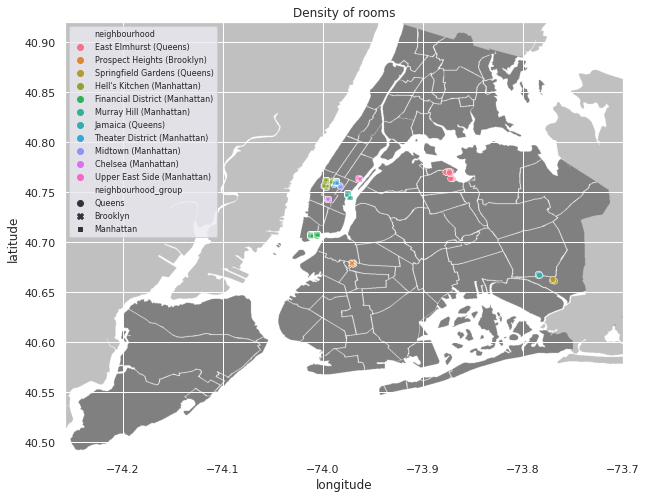

In [130]:
data = top_10_review_host[["latitude","longitude",'neighbourhood_group','host_name','neighbourhood']]
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#adding the image from wikipedia
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
#reading the image
image=plt.imread(img)
#scaling img with max latitude and logtitude and makeig some minor adgustment to fit the points
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
#creating an scaterplot
sns.scatterplot(data = data,x='longitude',y='latitude',hue='neighbourhood',style="neighbourhood_group" ).set_title('Density of rooms')
plt.legend(loc="upper left", frameon=True, fontsize=8)
plt.show()

In [131]:
top_10_review_host.head()

id  ...                             host_name_id
7086   5115372  ...                      Danielle (26432133)
9323   7125107  ...                          Maya (37312959)
9689   7453537  ...  Brooklyn&   Breakfast    -Len- (344035)
10420  7979237  ...  Brooklyn&   Breakfast    -Len- (344035)
10544  8097567  ...  Brooklyn&   Breakfast    -Len- (344035)

[5 rows x 16 columns]

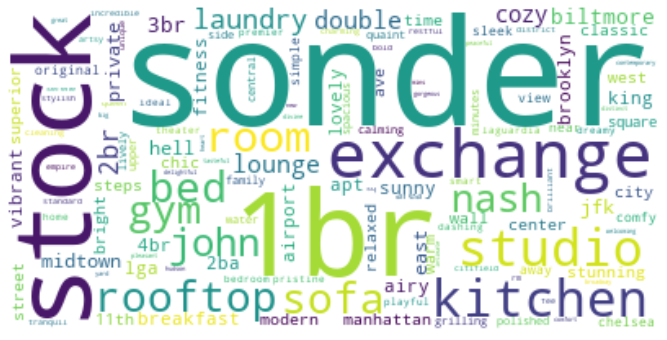

In [132]:
#Creating the text variable

text = " ".join(name for name in top_10_review_host.name)

text=text.lower()

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

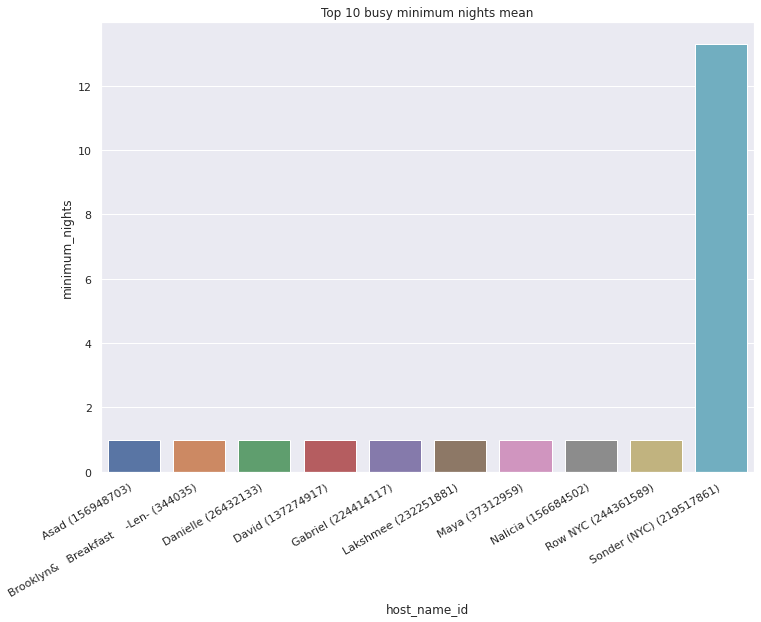

In [133]:
top_10_nights_mean = top_10_review_host.groupby('host_name_id').minimum_nights.mean().reset_index()
sns.barplot(x='host_name_id', y='minimum_nights', data=top_10_nights_mean)
plt.title("Top 10 busy minimum nights mean")
plt.xticks(rotation=30,ha='right')

**9. Which hosts are more popular and why?**

In [134]:
#extracting list of top 10 most busy host by listing
top_10_popular_host_list=df.groupby(['host_id']).id.count().sort_values(ascending=False).reset_index()[:10]['host_id'].tolist()
# making a df for top 10 hosts 
top_10_popular_host=df[df.host_id.isin(top_10_popular_host_list)]
top_10_popular_host['host_name_id']=top_10_popular_host['host_name']+' ('+top_10_popular_host['host_id'].map(str)+')'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [135]:
# First let's get the median amount the top 10 receive per night
top10_median = top_10_popular_host.groupby('host_name').price.median().reset_index().rename(columns={'price':'median price'})
top10_mean = top_10_popular_host.groupby('host_name').price.mean().reset_index()
# Barplot showing how much people pay for the rentals of the top 10 hosts
plt.figure(figsize=(17,8))

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

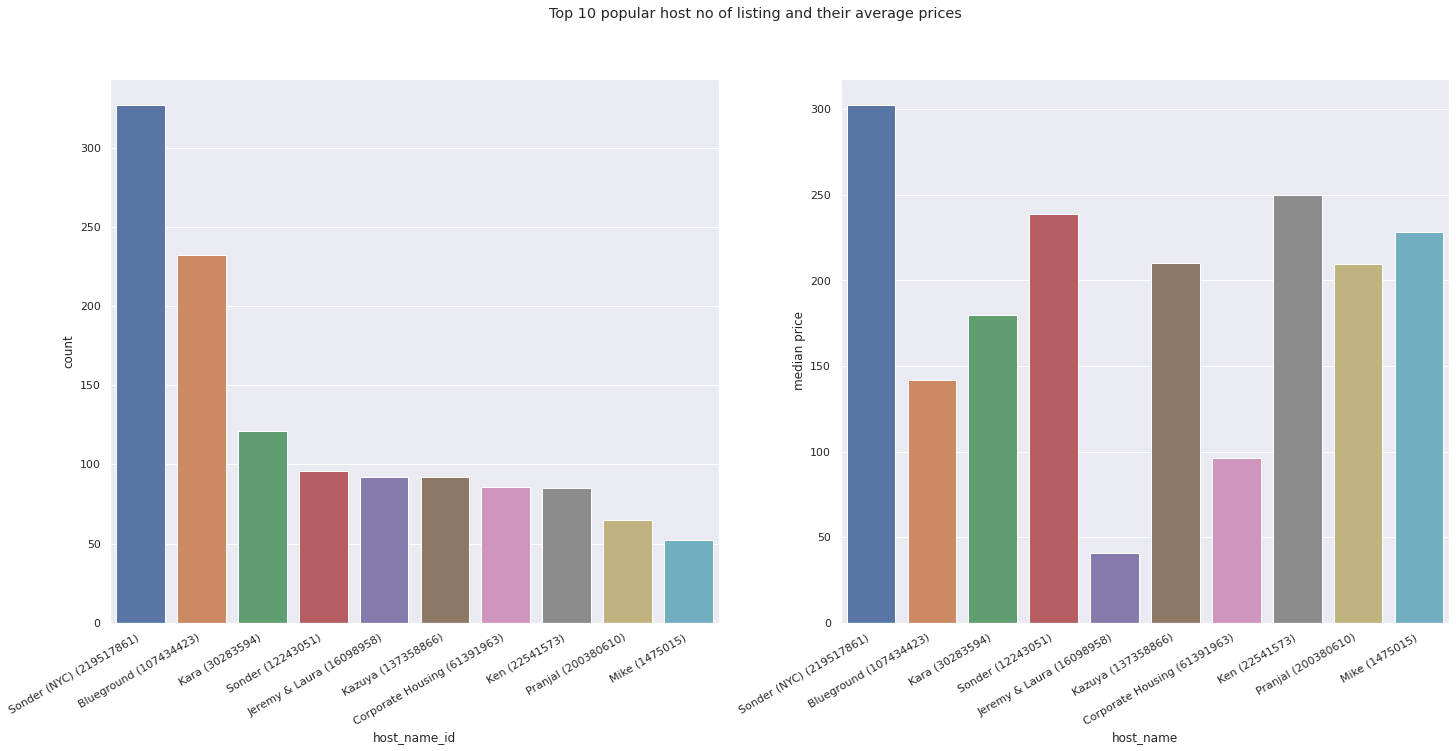

In [136]:
fig, axes = plt.subplots(1,2, figsize=(24, 10))
fig.suptitle('Top 10 popular host no of listing and their average prices ')
#ploting a graph of host name vs total reviews per month
sns.countplot(ax=axes[0],x='host_name_id',data=top_10_popular_host,order=top_10_popular_host.host_name_id.value_counts().iloc[:10].index)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')
#ploting a graph of host name vs  median price
sns.barplot(ax=axes[1],x='host_name', y='median price', data=top10_median)
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')
plt.show()

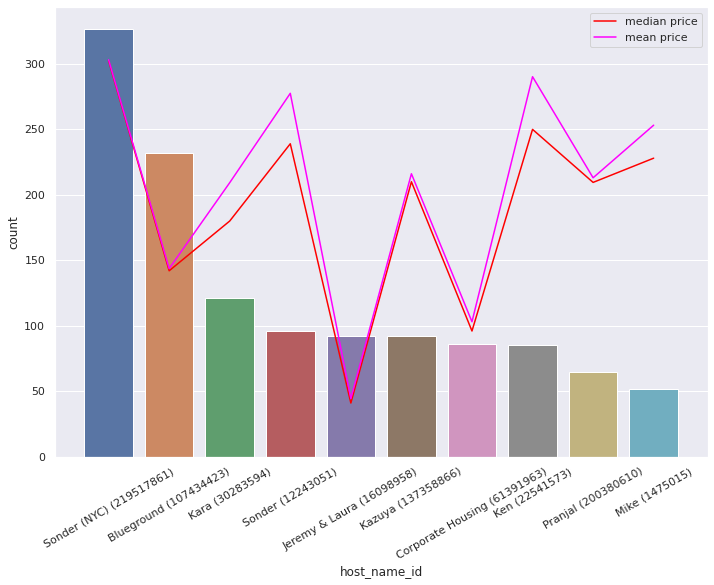

In [137]:
sns.countplot(x='host_name_id',data=top_10_popular_host,order=top_10_popular_host.host_name_id.value_counts().iloc[:10].index)
plt.xticks(rotation=30)

sns.lineplot(x='host_name', 
             y="median price",
             color='red',
             label='median price',
             data=top10_median)
sns.lineplot(x='host_name', 
             y="price",
             color='fuchsia',
             label='mean price',
             data=top10_mean)
plt.show()

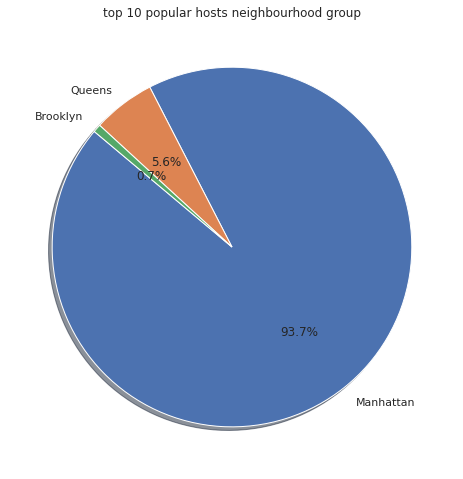

In [138]:
label=top_10_popular_host['neighbourhood_group'].value_counts().index.to_list()
plt.pie(top_10_popular_host['neighbourhood_group'].value_counts(),labels=label, autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("top 10 popular hosts neighbourhood group")
plt.show()

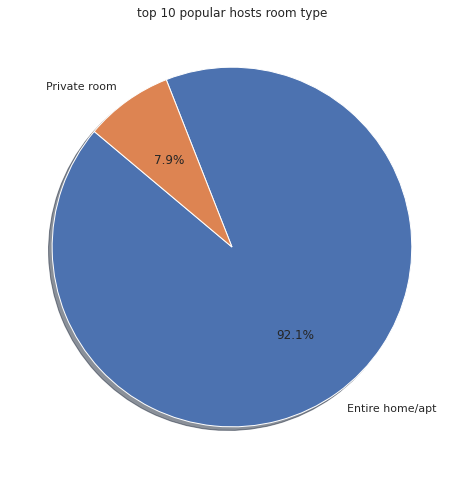

In [139]:
label=top_10_popular_host['room_type'].value_counts().index.to_list()
plt.pie(top_10_popular_host['room_type'].value_counts(),labels=label, autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("top 10 popular hosts room type")
plt.show()

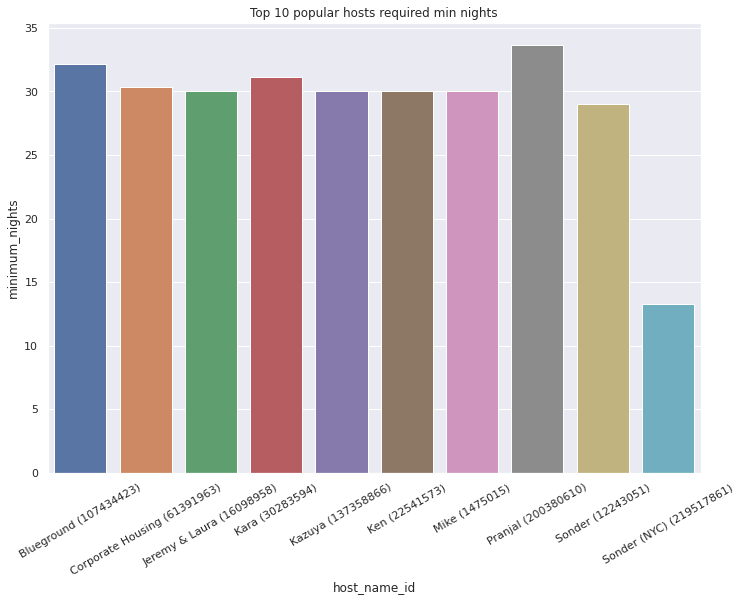

In [140]:
top_10_nights_mean = top_10_popular_host.groupby('host_name_id').minimum_nights.mean().reset_index()
sns.barplot(x='host_name_id', y='minimum_nights', data=top_10_nights_mean).set_title('Top 10 popular hosts required min nights')
plt.xticks(rotation=30)
plt.show()

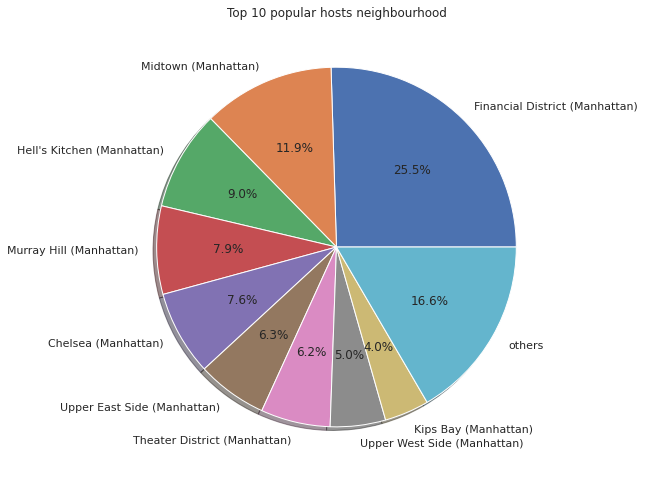

In [141]:
#the full dataframe
df_pie=top_10_popular_host.copy()
df_pie['neighbourhood']=top_10_popular_host['neighbourhood'] + ' ('+ top_10_popular_host['neighbourhood_group']+')'
df_pie = df_pie['neighbourhood'].value_counts().reset_index().rename(columns={"index": "neighbourhood", "neighbourhood": "no_of_homes"})
  #the top 5
df2 = df_pie[:9].copy()

#others
new_row = pd.DataFrame(data = {'neighbourhood' : ['others'], 'no_of_homes' : [df_pie['no_of_homes'][9:].sum()]})

#combining top 5 with others
df2 = pd.concat([df2, new_row])
labels = df2['neighbourhood']
pie=plt.pie(x='no_of_homes',data=df2,labels=labels, autopct='%1.1f%%',shadow=True)
# plt.legend(pie[0],labels, bbox_to_anchor=(0.6,0.5), loc="center right", fontsize=10, 
#            bbox_transform=plt.gcf().transFigure)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.title("Top 10 popular hosts neighbourhood")
plt.show()

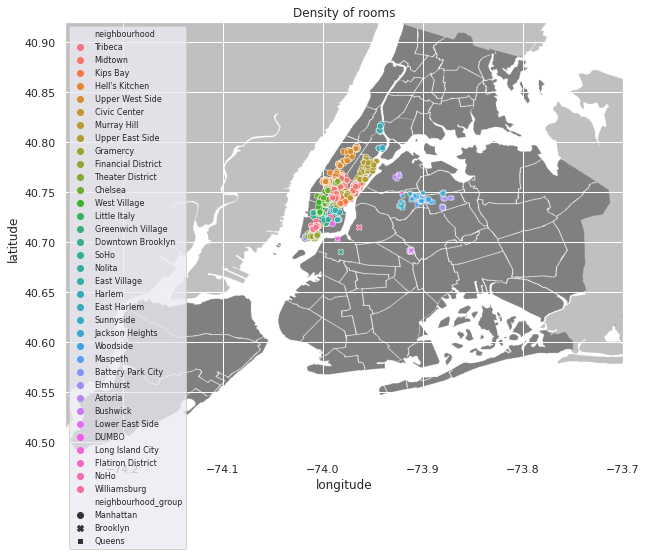

In [142]:
data = top_10_popular_host[["latitude","longitude",'neighbourhood_group','host_name','neighbourhood']]
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#adding the image from wikipedia
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
#reading the image
image=plt.imread(img)
#scaling img with max latitude and logtitude and makeig some minor adgustment to fit the points
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
#creating an scaterplot
sns.scatterplot(data = data,x='longitude',y='latitude',hue='neighbourhood',style="neighbourhood_group" ).set_title('Density of rooms')
plt.legend(loc="upper left", frameon=True, fontsize=8)

1) These top 10 have room prices over the average this might be because they have room in the most expensive part of new york.

2) They probably focus on business rentals over-tourism rentals because

1. After searching on Internet, I saw that Sonder, Blueground are rental companies in NYC.

2. corporate houses in its name suggests that people are used more for buisenss rentals

3. The graphic that shows the top 10 with an average rental length of 30 days which is higher than the mean of the entire data set i.e 7 days. 30 days looks more like a business rental than a vacation.

**13) Ideal room conditions to gain max out of it**

1. Price range shoud be betwenn 50 and 200.
2. location should be either lower Manhattan or near Manhattan in Brooklyn or near key locations such as an airport
3. If in Manhattan the room type should be an entire home or private in any other borough
4. Minimum night requirement should be either between 1-3 for holiday booking and 30 days for buisness bookings.

**13.1) which neighbourhood_group(city) has more no of listings and of which type ?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Neighbourhood group')

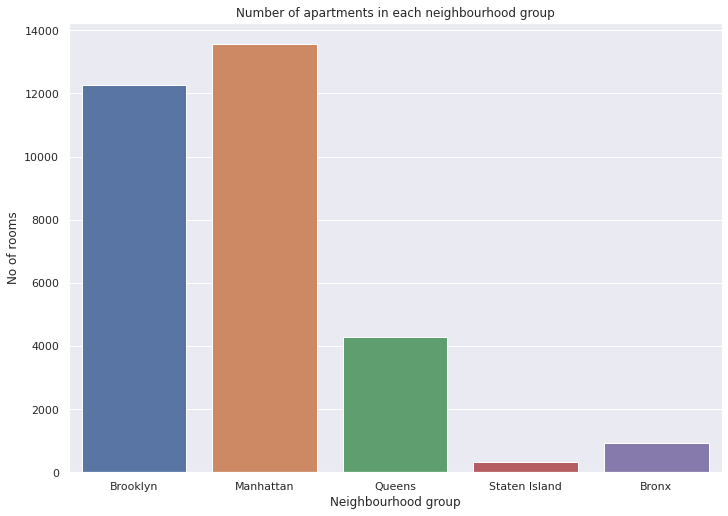

In [143]:
#creating a count plot 
sns.countplot(df.neighbourhood_group).set_title('Number of apartments in each neighbourhood group')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood group')

Text(0.5, 0, 'Neighbourhood group')

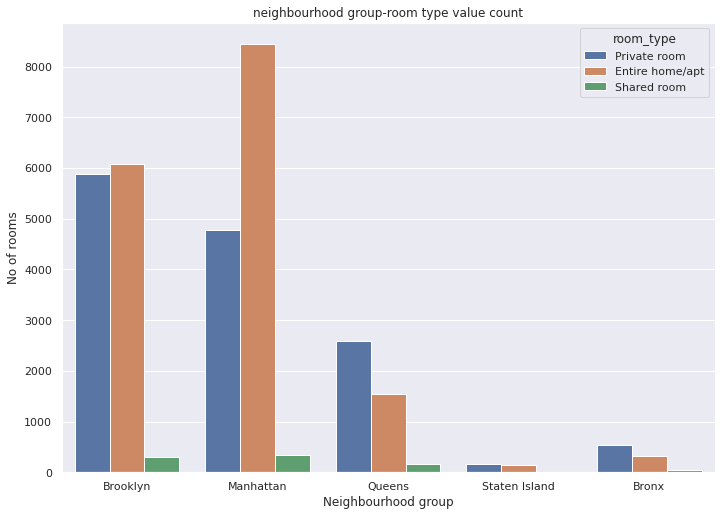

In [144]:
#creating a count plot
sns.countplot(data=df,x='neighbourhood_group',hue='room_type').set_title('neighbourhood group-room type value count')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood group')

Observation

1. We can see that most no of rooms are in Manhattan followed by brooklyn and queens
2. Manhattan people prefer to book an entire home rather than a private room. Brooklyn, both have approx equal no of count while people do not prefer a shared room in either of the city.

**13.2) which neighbourhood has more no of listings and of which type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

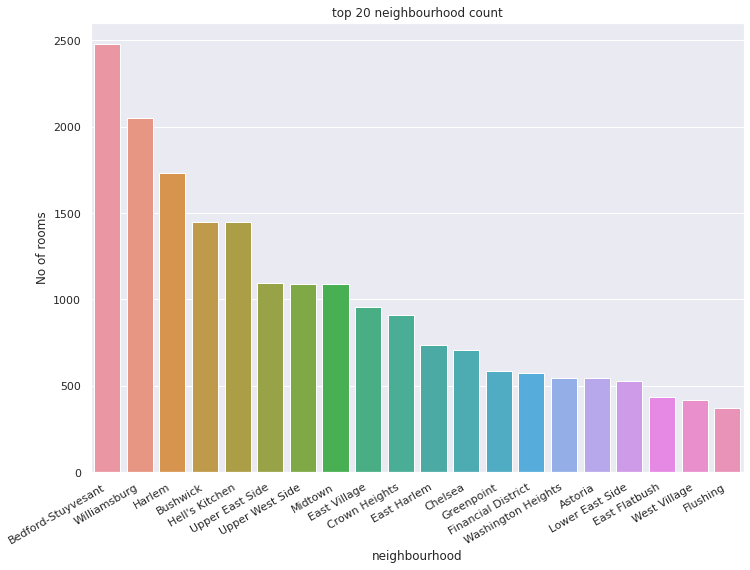

In [145]:
#creating a count plot
sns.countplot(df.neighbourhood, order = df.neighbourhood.value_counts().iloc[:20].index ).set_title('top 20 neighbourhood count')
#rotating the x axis labels 
plt.xticks(rotation=30,ha='right')
#adding x and y labels to the plot
plt.ylabel('No of rooms')

Text(0.5, 1.0, 'Top 15 areas that have highest number of listing')

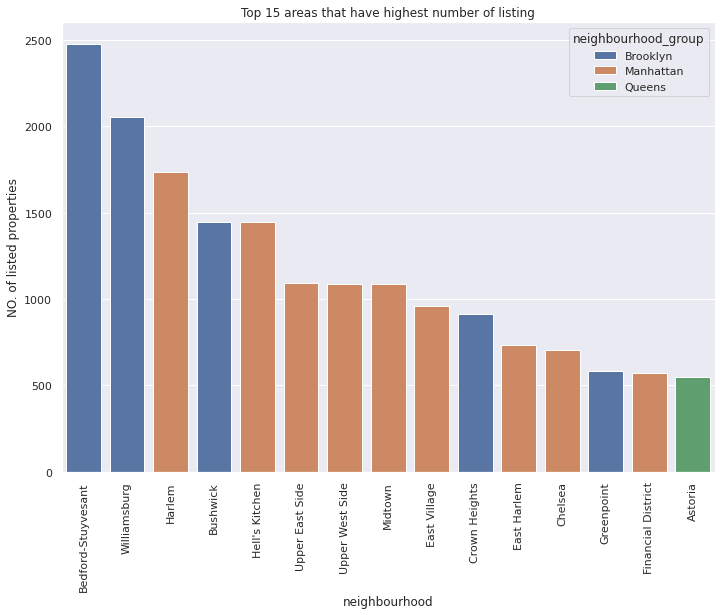

In [146]:
#top planning areas
top_planing_area=df.groupby(['neighbourhood_group']).neighbourhood.value_counts(ascending=True).sort_values(ascending=False).head(15).to_frame('NO. of listed properties').reset_index()
a=sns.barplot(x='neighbourhood',y='NO. of listed properties',hue='neighbourhood_group',data=top_planing_area,dodge = False)
plt.xticks(rotation=90)
a.set_title('Top 15 areas that have highest number of listing')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

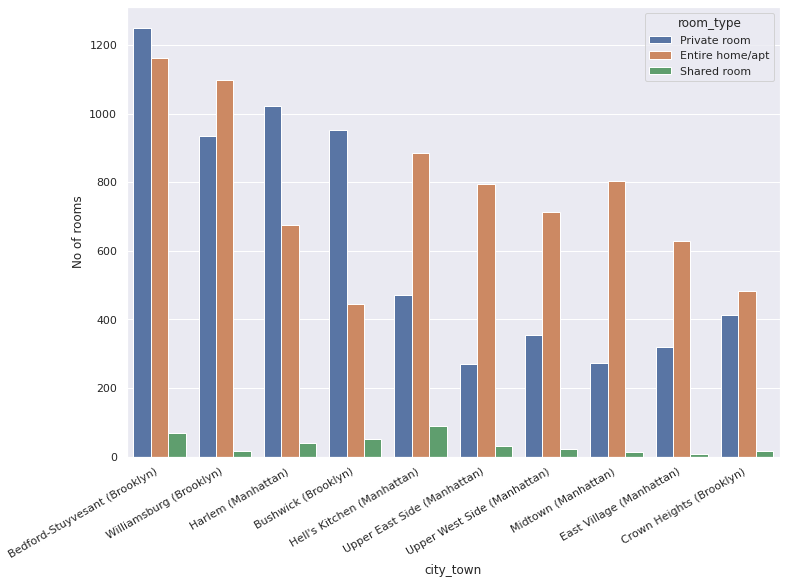

In [147]:
city_town_df=df.copy()
city_town_df['city_town']=df['neighbourhood']+' ('+df['neighbourhood_group']+')'
sns.countplot(city_town_df.city_town, order = city_town_df.city_town.value_counts().iloc[:10].index ,hue=df['room_type'])
#rotating the x axis labels 
plt.xticks(rotation=30,ha='right')
#adding x and y labels to the plot
plt.ylabel('No of rooms')

observations

1) all the top 10 neighbourhood are from brooklyn and manhattan

2) brooklyn has almost equal no of private and entire apt room type

3) manhatan has more no of entire apt than private and shared room combined

**13.3) price distribution across different neighbourhood**

In [148]:
city_room_type_df=df.groupby(['neighbourhood_group','room_type']).agg({'price':'median'}).sort_values('price',ascending=False).reset_index().rename(columns={"price": "median_price"})
neighbourhood_group_df=df.groupby(['neighbourhood_group']).agg({'price':'median'}).sort_values('price',ascending=False).reset_index().rename(columns={"price":"median_price"})

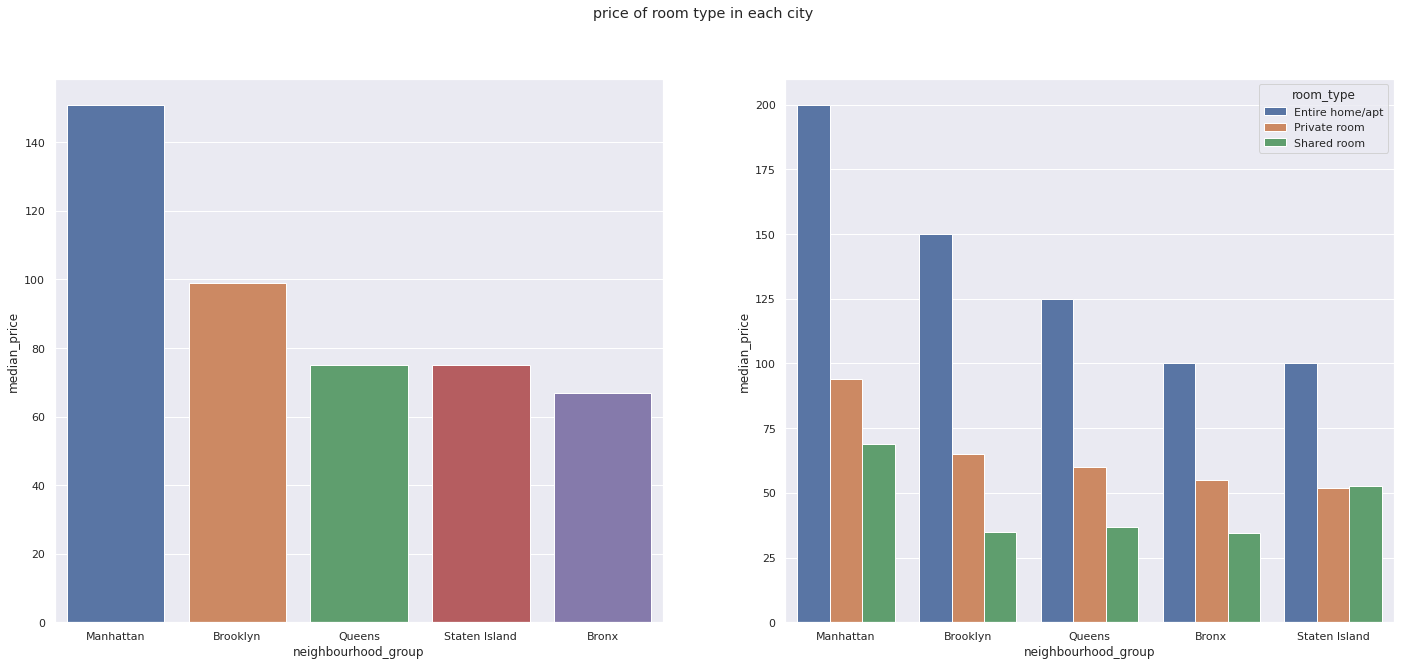

In [149]:
fig, axes = plt.subplots(1,2, figsize=(24, 10))
fig.suptitle('price of room type in each city')
sns.barplot(ax=axes[0],data=neighbourhood_group_df,x='neighbourhood_group',y='median_price')
sns.barplot(ax=axes[1],data=city_room_type_df,x='neighbourhood_group',hue='room_type',y='median_price')

Observations

Among all the cities manhattan houses are most expensive for all the room types followed by Brooklyn and Bronx are least expensive

Text(0.5, 1.0, 'Density and distribution of prices under 500 for each neighberhood_group')

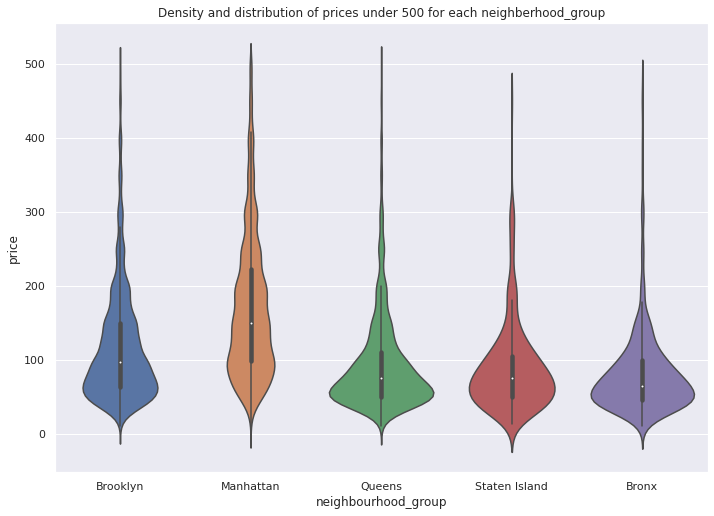

In [150]:
#creating a sub-dataframe with  extreme values  less than 500
sub_df=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
sns.violinplot(data=sub_df, x='neighbourhood_group', y='price').set_title('Density and distribution of prices under 500 for each neighberhood_group')

Observations

In this violin plot, we can observe the distribution of prices. We can state that Manhattan has the highest range of prices with an average of 150, Brooklyn with 90. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest. We can conclude that Manhattan is one of the most expensive places followed by Brooklyn and Queens.

**13.4) what price range of rooms are more**

Text(0, 0.5, 'No of rooms')

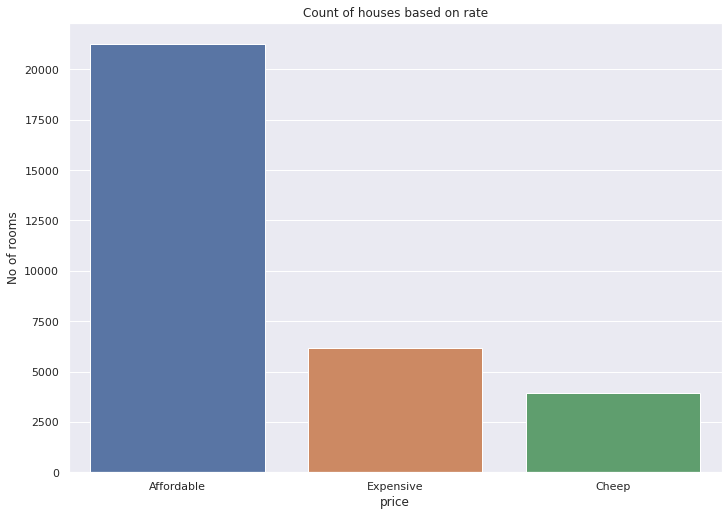

In [151]:
'''
dividing price range in 3 groups 
1) cheep i.e price below 50
2) affordable i.e price betwenn 50 & 200
3) expensive i.e price above 200
'''
def price_catagory(price):
  if price<=50:
    return 'Cheep'
  elif price>=50 and price<=200:
    return 'Affordable'
  else:
    return 'Expensive'
#creating a count plot 
sns.countplot(x=df.price.apply(price_catagory)).set_title('Count of houses based on rate')
#adding y label to the plot
plt.ylabel('No of rooms') 

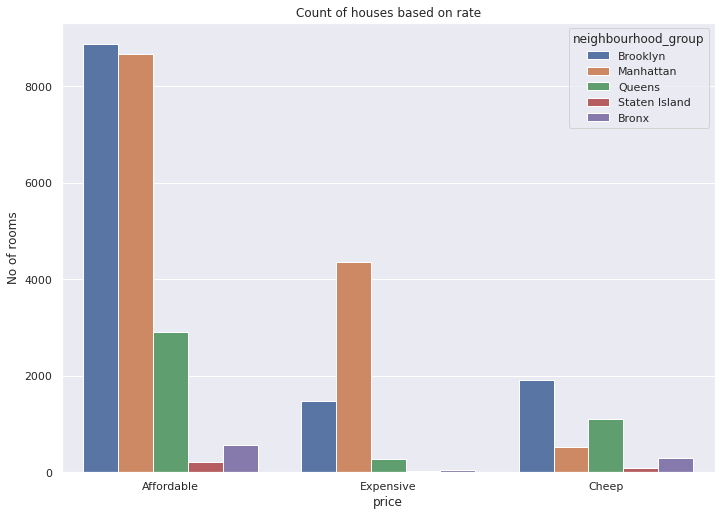

In [152]:
'''
dividing price range in 3 groups 
1) cheep i.e price below 50
2) affordable i.e price betwenn 50 & 200
3) expensive i.e price above 200
'''
def price_catagory(price):
  if price<=50:
    return 'Cheep'
  elif price>=50 and price<=200:
    return 'Affordable'
  else:
    return 'Expensive'
#creating a count plot 
sns.countplot(x=df.price.apply(price_catagory), hue=df.neighbourhood_group).set_title('Count of houses based on rate')
#adding y label to the plot
plt.ylabel('No of rooms') 
plt.show()


**13.5) Top 10 minimum_nights which gain max reviews per month**

In [153]:
# top 10 minimum_nights which gain reviews
review_min_nights=df.groupby('minimum_nights').agg({'reviews_per_month':'sum'}).reset_index().sort_values(['reviews_per_month'],ascending=False)[:10]

Text(0, 0.5, 'Total Review per month')

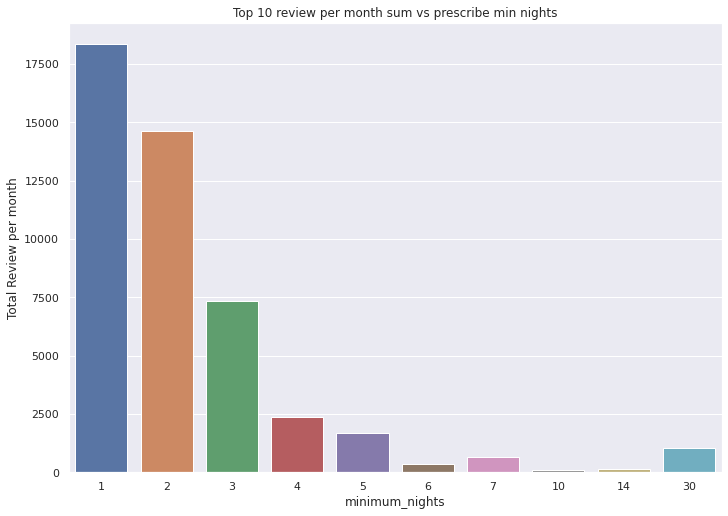

In [154]:
sns.barplot(x='minimum_nights',y='reviews_per_month',data=review_min_nights).set_title('Top 10 review per month sum vs prescribe min nights')
plt.ylabel('Total Review per month')

Observations

The rooms with min number of days between 1 and 4 earn max reviews

Text(0, 0.5, 'Review per month * min nights')

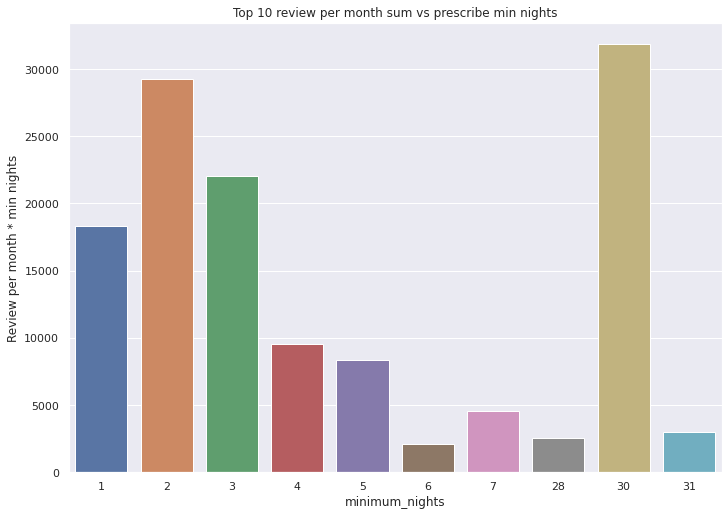

In [155]:
review_min_nights1=df.groupby('minimum_nights').agg({'reviews_per_month':'sum'}).reset_index()
review_min_nights1['reviews_per_month']=review_min_nights1['reviews_per_month']*review_min_nights1['minimum_nights']
review_min_nights1=review_min_nights1.sort_values(['reviews_per_month'],ascending=False)[:10]
sns.barplot(x='minimum_nights',y='reviews_per_month',data=review_min_nights1).set_title('Top 10 review per month sum vs prescribe min nights')
plt.ylabel('Review per month * min nights')

Observations

The rooms with min number of days 1,2,3,30 earn max reviews of we multipy the min nights with the total rev per month